# **Part 4 - Feature Engineering**

## Objectives

* Complete the Feature Engineering stage of our ML development workflow for our regression model 

## Inputs

* Train & Test sets for our features and variables
    * Train: 
        * X_train - inputs/datasets/cleaned/X_train.csv
        * y_train - inputs/datasets/cleaned/y_train.csv
    * Test:
        * X_test - inputs/datasets/cleaned/X_test.csv
        * y_test - inputs/datasets/cleaned/X_train.csv

## Outputs

* Generate a list of features to engineer and the chosen transformers selected to be integrated into the model pipeline



---

# Change working directory

* As the notebooks are stored in a subfolder, when running the notebook in the editor, the working directory will need to be adjusted.

The working directory will be changed from its current folder to its parent folder
* access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Project5-PredictiveAnalytics-HeritageHousing/jupyter_notebooks'

The parent of the current directory needs to be made the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


* Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Project5-PredictiveAnalytics-HeritageHousing'

---

## Loading Cleaned Data Set

### **Train Set**

In [4]:
import pandas as pd 
X_train = pd.read_csv('./outputs/datasets/clean/X_train.csv')
y_train = pd.read_csv('./outputs/datasets/clean/y_train.csv')

**X_train** - *(Features)*

In [5]:
X_train.head(10)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      1222     698.0           4.0           No           0          Unf   
1      1165       0.0           4.0           No           0          Unf   
2       698     430.0           2.0           No           0          Unf   
3      1844       0.0           2.0           No         976          GLQ   
4      1419       0.0           2.0           Av         945          Unf   
5      1422    1177.0           4.0           No           0          Unf   
6      1629       0.0           3.0           Av        1300          GLQ   
7       954     795.0           5.0           No           0          Unf   
8      2515       0.0           4.0           No        1219          Rec   
9       993     915.0           4.0           No           0          Unf   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotArea  \
0        570            0.0         487          RFn  ...    10192   
1       1141            0.0         420          Fin  ...    12090   
2        698            0.0         528          RFn  ...     7500   
3        868            0.0         620          Fin  ...    10994   
4        474            0.0         567          RFn  ...     8089   
5       1393            0.0         779          Fin  ...    14774   
6        316            0.0         808          Fin  ...    14536   
7        795            0.0         440          Unf  ...     6204   
8        816            0.0         484          Unf  ...    32668   
9        967            0.0         431          Fin  ...    14191   

   LotFrontage MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  \
0        102.0      143.0           98            6            7          570   
1         93.0      650.0          123            5            8         1141   
2         60.0        0.0            0            4            4          698   
3         88.0      366.0           44            5            8         1844   
4         60.0        0.0            0            6            8         1419   
5        108.0      165.0           30            5            9         1393   
6         85.0      236.0          252            5            8         1616   
7         60.0        0.0          188            5            4          795   
8         69.0        0.0            0            3            6         2035   
9         85.0        0.0            0            5            8          967   

   WoodDeckSF  YearBuilt  YearRemodAdd  
0         0.0       1968          1992  
1       144.0       1998          1998  
2         0.0       1920          1950  
3         0.0       2005          2006  
4         0.0       2007          2007  
5         0.0       1999          1999  
6         0.0       2002          2003  
7         0.0       1912          1950  
8         0.0       1957          1975  
9         0.0       2002          2002  

[10 rows x 23 columns]

**y_train** - *(Target)*

In [6]:
y_train.head(10)

SalePrice
0     170000
1     258000
2      68400
3     257000
4     392000
5     333168
6     270000
7     118500
8     200624
9     202900

### **Test Set**

In [7]:
X_test = pd.read_csv('./outputs/datasets/clean/X_test.csv')
y_test = pd.read_csv('./outputs/datasets/clean/y_test.csv')

**X_test** - *(Features)*

In [8]:
X_test.head(10)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      1188       0.0           3.0           No         593          Unf   
1      1153     878.0           3.0           Av         252          ALQ   
2      1099       0.0           3.0           No           0          Unf   
3      1602       0.0           3.0           No        1246          ALQ   
4      1148       0.0           3.0           No        1148          BLQ   
5       661     589.0           3.0           No           0          Unf   
6      1166    1129.0           4.0           No         728          GLQ   
7      1473       0.0           1.0           Gd        1324          GLQ   
8      1360       0.0           3.0           No         384          ALQ   
9      1686     762.0           4.0           No        1361          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotArea  \
0        595            0.0         312          Unf  ...    26142   
1        901            0.0         541          Fin  ...    11404   
2       1099            0.0         352          Unf  ...     9525   
3        356            0.0         529          Fin  ...    16635   
4          0            0.0         672          Unf  ...     7931   
5        661            0.0         552          Unf  ...     5362   
6        367            0.0         590          RFn  ...    13346   
7        113            0.0         452          Unf  ...    25095   
8          0            0.0         572          Unf  ...     7134   
9         88            0.0         711          RFn  ...    46589   

   LotFrontage MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  \
0         69.0      189.0           39            7            5         1188   
1         75.0      202.0           84            5            7         1153   
2         75.0        0.0            0            6            5         1099   
3         69.0      126.0            0            7            6         1602   
4         70.0        0.0            0            5            5         1148   
5         53.0        0.0            0            6            5          661   
6         69.0        0.0           40            5            7         1095   
7         65.0        0.0           48            8            5         1437   
8         60.0        0.0           50            5            5          384   
9         52.0      528.0           76            7            8         1629   

   WoodDeckSF  YearBuilt  YearRemodAdd  
0         0.0       1962          1962  
1         0.0       1998          1999  
2         0.0       1995          2006  
3         0.0       1977          2000  
4         0.0       1959          1959  
5         0.0       1910          2003  
6         0.0       1992          2000  
7         0.0       1968          2003  
8         0.0       1955          1955  
9         0.0       1994          2005  

[10 rows x 23 columns]

**y_test** - *(Target)*

In [9]:
y_test.head(10)

SalePrice
0     157900
1     222500
2     144000
3     215000
4     132500
5     139000
6     268000
7     143000
8     130000
9     402000

---

## Data Exploration

We will first carry out the data exploration steps again on our cleaned data set. This analysis can also help to decide on any potential transformations we are considering as part of this feature engineering stage of the workflow.

First we will generate the profiling reports for our train sets

In [10]:
from ydata_profiling import ProfileReport
cleaned_x_report = ProfileReport(df=X_train, minimal=True)
cleaned_x_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
cleaned_x_report = ProfileReport(df=y_train, minimal=True)
cleaned_x_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Now we will examine the correlation levels and PPS score using the same custom code as in the Data Cleaning notebook

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

def heatmap_corr(df,threshold, figsize=(20,12), font_annot = 8):
  if len(df.columns) > 1:
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(df) < threshold] = True

    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                linewidth=0.5
                     )
    axes.set_yticklabels(df.columns, rotation = 0)
    plt.ylim(len(df.columns),0)
    plt.show()


def heatmap_pps(df,threshold, figsize=(20,12), font_annot = 8):
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=np.bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, xticklabels=True,yticklabels=True,
                       mask=mask,cmap='rocket_r', annot_kws={"size": font_annot},
                       linewidth=0.05,linecolor='grey')
      
      plt.ylim(len(df.columns),0)
      plt.show()



def CalculateCorrAndPPS(df):
  df_corr_spearman = df.corr(method="spearman")
  df_corr_pearson = df.corr(method="pearson")

  pps_matrix_raw = pps.matrix(df)
  pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

  pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
  print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
  print(pps_score_stats.round(3))

  return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix,CorrThreshold,PPS_Threshold,
                      figsize=(20,12), font_annot=8 ):

  print("\n")

  print("\n")
  print("*** Heatmap: Spearman Correlation ***")
  print("It evaluates monotonic relationship \n")
  heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Pearson Correlation ***")
  print("It evaluates the linear relationship between two continuous variables \n")
  heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Power Predictive Score (PPS) ***")
  print(f"PPS detects linear or non-linear relationships between two columns.\n")
  heatmap_pps(df=pps_matrix,threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [13]:
xtrain_corr_pearson, xtrain_corr_spearman, pps_matrix = CalculateCorrAndPPS(X_train)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  506.0  0.047  0.098  0.0  0.0  0.0  0.046  0.609


Again we will display the heatmaps to check correlation & PPS, also it is important to note that these levels will be slightly different from previously. As part of the Train/Test split we have separated our features and target, so you should notice <code>SalePrice</code> is no longer included in our heatmaps. This investigation is still useful for deciding which features to engineer and the respective transformers





*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



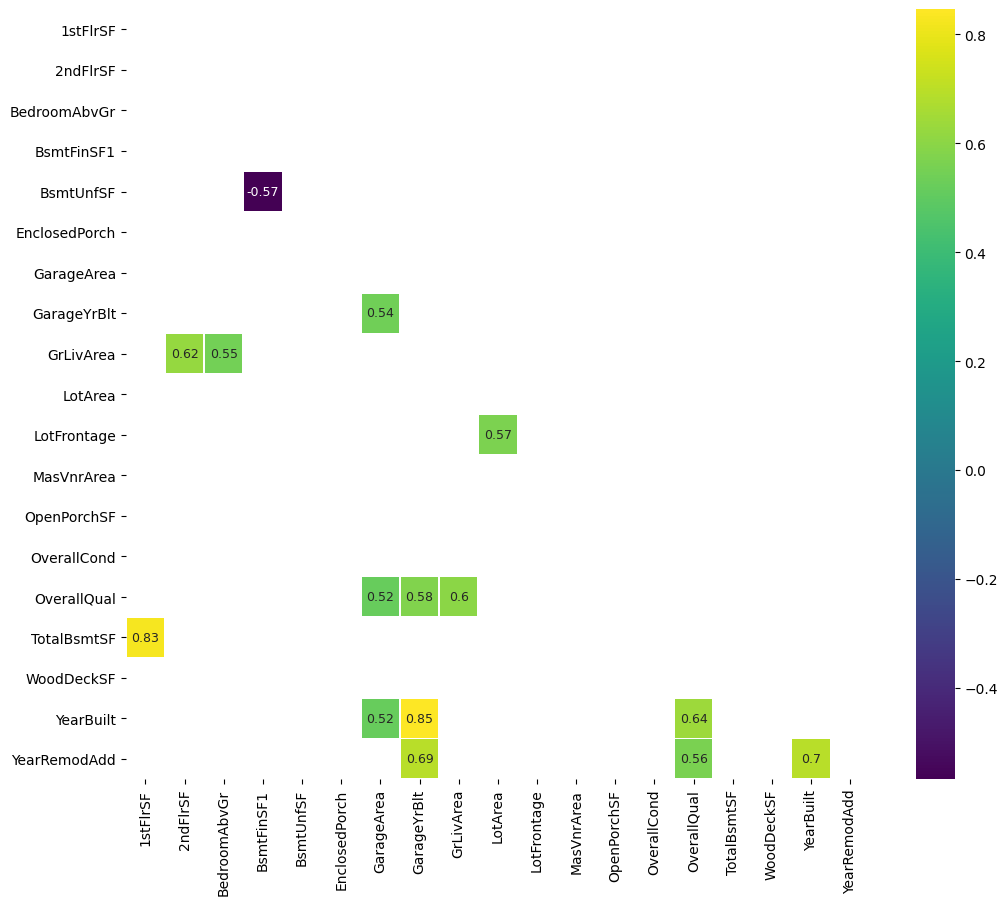



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



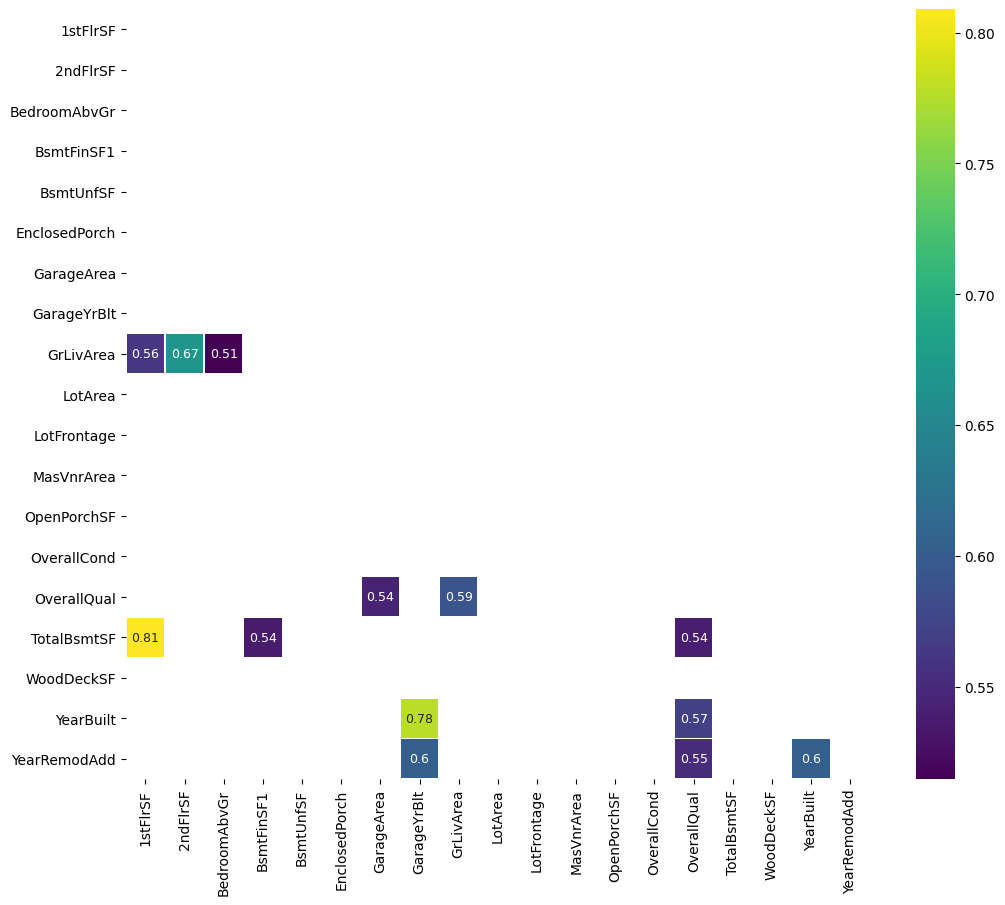



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.



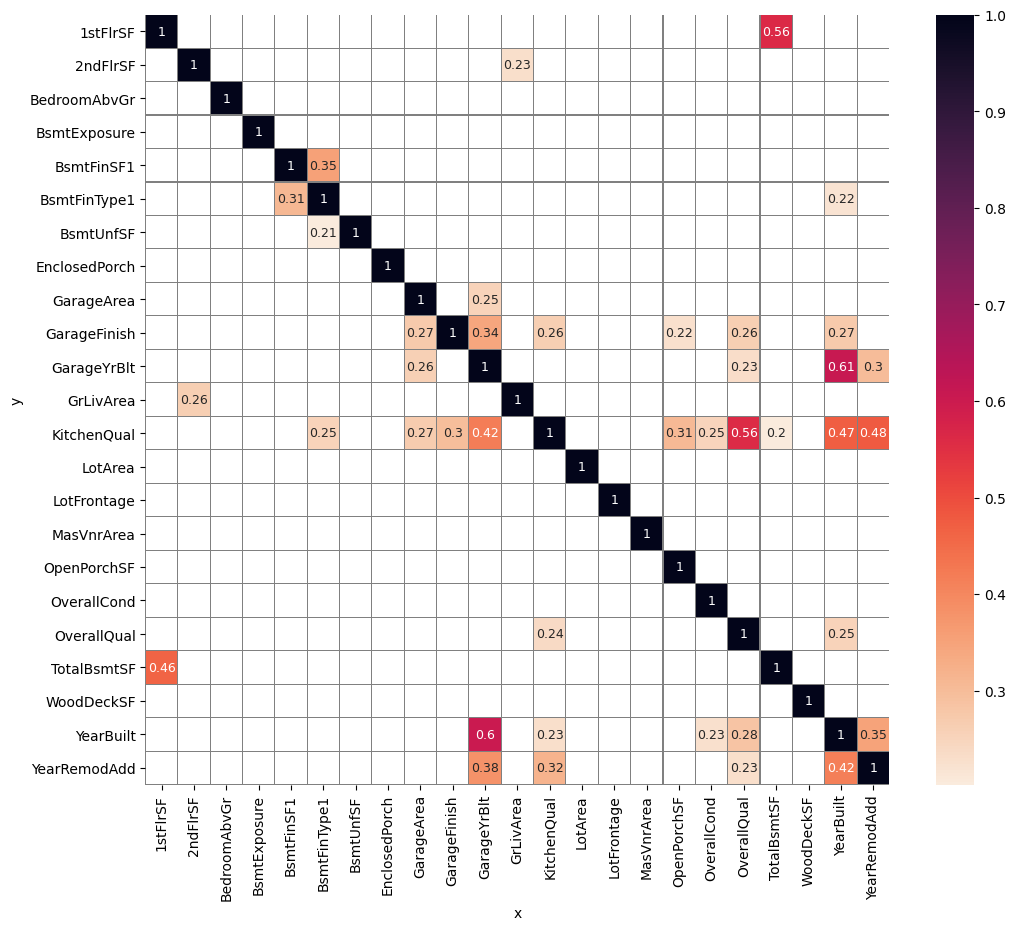

In [14]:
%matplotlib inline
DisplayCorrAndPPS(df_corr_pearson = xtrain_corr_pearson,
                  df_corr_spearman = xtrain_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.5, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=9)

---

### Feature Engineering

In our table we list our features, type and the chosen transformers we have selected for use in our model training. Next we will see the analysis undertaken to arrive at these conclusions.

| Feature | Type |  Chosen Transformer |
| --- | --- | --- |
| <code>1stFlrSF</code> | Numerical | SmartCorrelationSelection <br> BoxCoxTransformer |
| <code>2ndFlrSF</code> | Numerical | SmartCorrelationSelection |
| <code>BedroomAbvGr</code> | Numerical | SmartCorrelationSelection|
| <code>BsmtExposure</code> | Categorical | SmartCorrelationSelection <br> OrdinalEncoder |
| <code>BsmtFinSF1</code> | Numerical | SmartCorrelationSelection <br> PowerTransformer|
| <code>BsmtFinType1</code> | Categorical | SmartCorrelationSelection <br> OrdinalEncoder |
| <code>BsmtUnfSF</code> | Numerical | SmartCorrelationSelection <br> PowerTransformer |
| <code>EnclosedPorch</code> | Numerical | SmartCorrelationSelection <br> YeoJohnsonTransformer |
| <code>GarageArea</code> | Numerical | SmartCorrelationSelection |
| <code>GarageFinish</code> | Categorical | SmartCorrelationSelection <br> OrdinalEncoder |
| <code>GarageYrBuilt</code> | Numerical | SmartCorrelationSelection |
| <code>GrLivArea</code> | Numerical| SmartCorrelationSelection <br> LogTransformer (base 'e') <br> OutlierTrimmer |
| <code>KitchenQual</code> | Categorical | SmartCorrelationSelection <br> OrdinalEncoder |
| <code>LotArea</code> | Numerical | SmartCorrelationSelection <br> LogTransformer (base 'e') |
| <code>LotFrontage</code> | Numerical | SmartCorrelationSelection <br> YeoJohnsonTransformer <br> Winsorizer|
| <code>MasVnrArea</code> | Numerical | SmartCorrelationSelection <br> PowerTransformer |
| <code>OpenPorchSF</code> | Numerical | SmartCorrelationSelection <br> PowerTransformer | 
| <code>OverallCond</code> | Numerical/Categorical | SmartCorrelationSelection |
| <code>OverallQual</code> | Numerical/Categorical | SmartCorrelationSelection|
| <code>TotalBsmtSF</code> | Numerical | SmartCorrelationSelection <br> YeoJohnsonTransformer <br> Winsorizer |
| <code>WoodDeckSF</code> | Numerical | SmartCorrelationSelection <br> YeoJohnsonTransformer |
| <code>YearBuilt</code> | Numerical | SmartCorrelationSelection |
| <code>YearRemodAdd</code> | Numerical | SmartCorrelationSelection |

---

## Categorical Encoding

As they are the fewest, we will start examining the Categorical features. 

In [15]:
from feature_engine.encoding import OrdinalEncoder
import scipy.stats as stats

*We will use some custom functions implemented as part of the code institute walkthrough project to generate some visualizations of how our transformers affect the features*

In [16]:
def DiagnosticPlots_Categories(df_feat_eng, col):
  plt.figure(figsize=(4, 3))
  sns.countplot(data=df_feat_eng, x=col, palette=['#432371'], order = df_feat_eng[col].value_counts().index)
  plt.xticks(rotation=90) 
  plt.suptitle(f"{col}", fontsize=30,y=1.05)        
  plt.show()
  print("\n")

def DiagnosticPlots_Numerical(df, variable):
  fig, axes = plt.subplots(1, 3, figsize=(12, 4))
  sns.histplot(data=df, x=variable, kde=True,element="step",ax=axes[0]) 
  stats.probplot(df[variable], dist="norm", plot=axes[1])
  sns.boxplot(x=df[variable],ax=axes[2])
  
  axes[0].set_title('Histogram')
  axes[1].set_title('QQ Plot')
  axes[2].set_title('Boxplot')
  fig.suptitle(f"{variable}", fontsize=30,y=1.05)
  plt.tight_layout()
  plt.show()

We will start with OrdinalEncoding to transform the categorical features into numerical values.
* We will set the encoding method as <code>ordered</code>

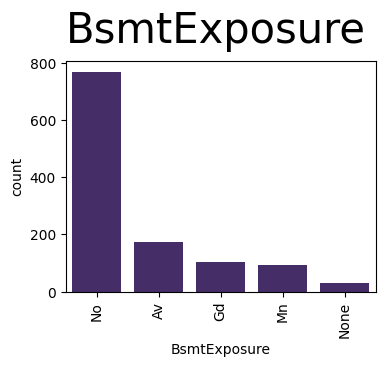

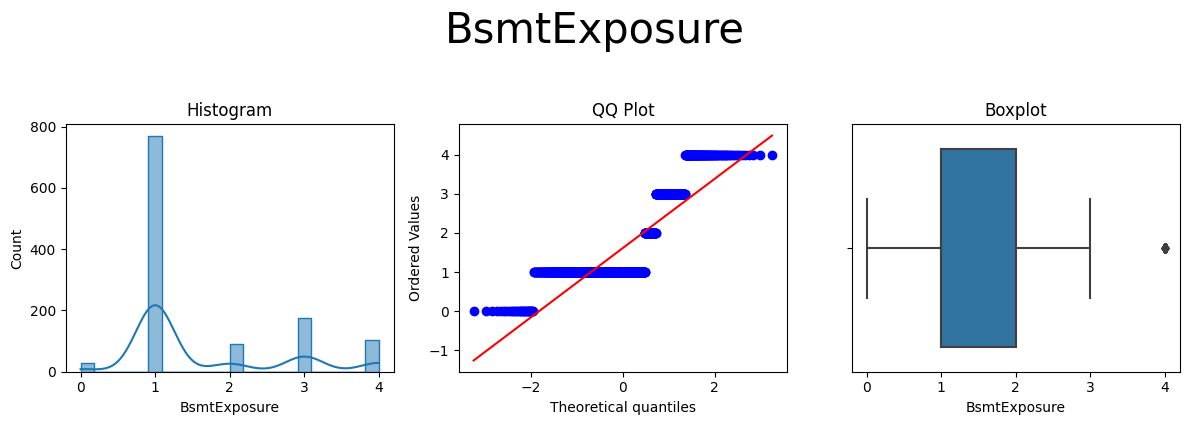

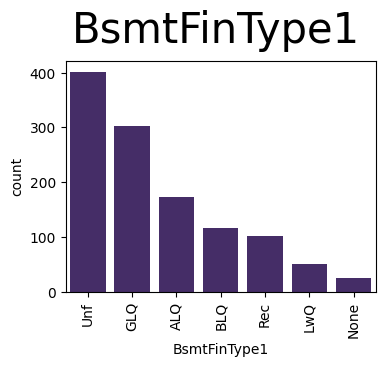

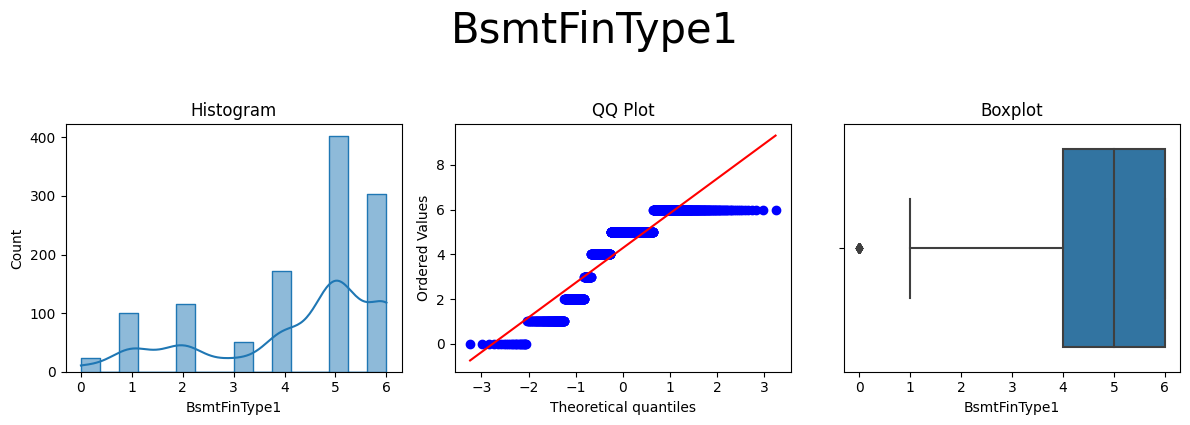

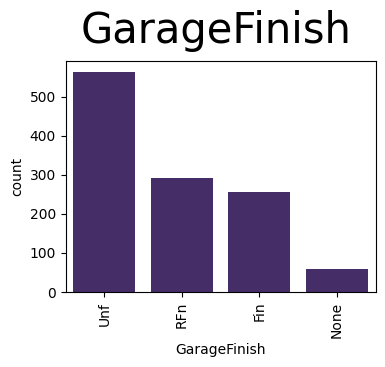

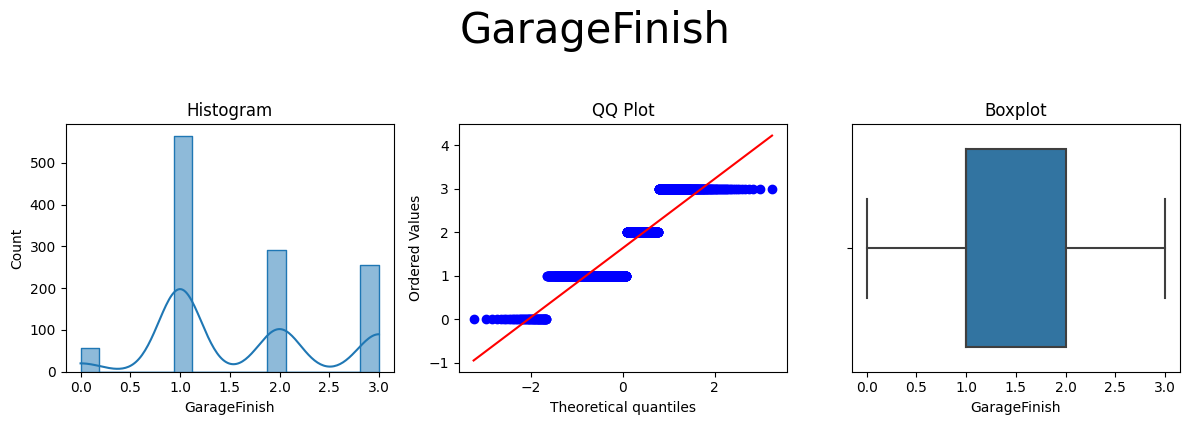

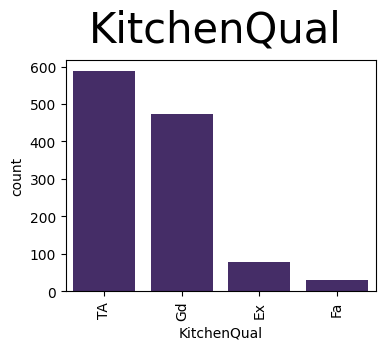

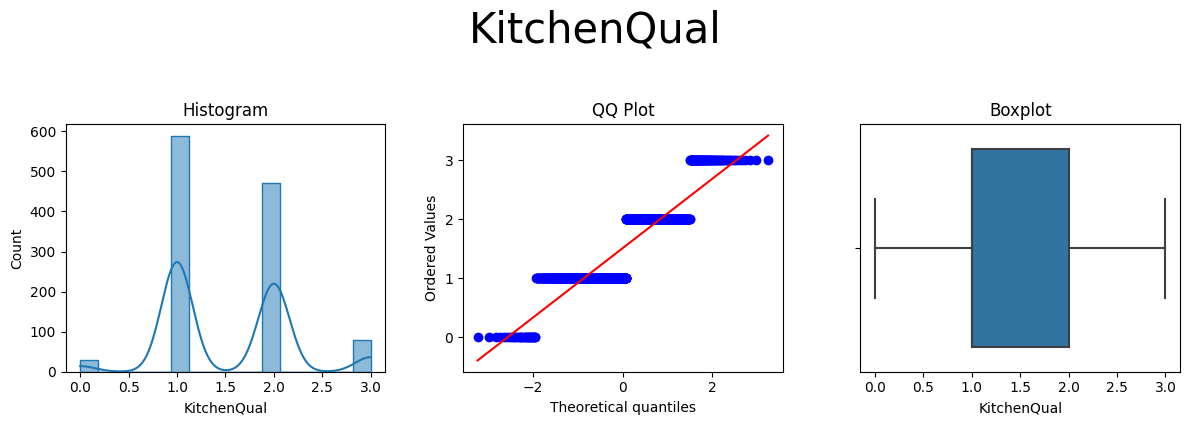

In [17]:
categorical_features = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
encoder = OrdinalEncoder(encoding_method='ordered', variables=categorical_features)
feat_eng_train = encoder.fit_transform(X_train, y_train) #, y_train
for feat in categorical_features:
    DiagnosticPlots_Categories(X_train, feat)
    DiagnosticPlots_Numerical(feat_eng_train, feat)

We are satisfied with our results so we can use this within our pipeline when we apply to our test set.

---

## Numerical Evaluation

In [18]:
from feature_engine import transformation as vt
import pingouin as pg

/workspace/.pip-modules/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


*Again we will use some custom functions as laid out in the code institute course material to test various numerical transformers*

***IMPORTANT NOTE***

*Developer Note:* the Pingouin package used for generating the Q-Q plots has caused a lot of issues. More recent version releases clash with the other dependencies of the project and affect the analysis carried out when rerunning the project, so an older version has had to been installed instead. However, some of the internal scripts of Pingouin, for the version being used (specifically <code>plotting.py</code>) use deprecated functions to add a title and lables to the QQ plot, that no longer work (specifically <code>scipy.stats.morestats</code>). So I have edited the script to remove these functions and replaced them with the <code>axes</code> methods <code>set_title</code>, <code>set_xlabel</code>, <code>set_ylabel</code> in my own custom code below.

In [24]:
def numerical_transformers(df_feat_eng, column):
  transformers_list = []

  ### LogTransformer base e
  try:
    lt = vt.LogTransformer(variables = column)
    log_base_e = lt.fit_transform(df_feat_eng)
    transformers_list.append(log_base_e)
  except ValueError as e:
    print(f"Unable to apply Log_e to {column}: {e} \n")
    log_base_e = 'NA'
    transformers_list.append(log_base_e)

  ### LogTransformer base 10
  try:
    lt10 = vt.LogTransformer(variables = column, base='10')
    log_10 = lt10.fit_transform(df_feat_eng)
    transformers_list.append(log_10)
  except ValueError as e:
    print(f"Unable to apply Log_10 to {column}: {e} \n")
    log_10 = 'NA'
    transformers_list.append(log_10)

  ### ReciprocalTransformer
  try:
    rt = vt.ReciprocalTransformer(variables = column)
    reciprocal =  rt.fit_transform(df_feat_eng)
    transformers_list.append(reciprocal)
  except ValueError as e:
    print(f"Unable to apply Reciprocal to {column}: {e} \n")
    reciprocal = 'NA'
    transformers_list.append(reciprocal)

  ### PowerTransformer
  try:
    pt = vt.PowerTransformer(variables = column)
    power = pt.fit_transform(df_feat_eng)
    transformers_list.append(power)
  except ValueError as e:
    print(f"Unable to apply Power to {column}: {e} \n")
    power = 'NA'
    transformers_list.append(power)

  ### BoxCoxTransformer
  try:
    bct = vt.BoxCoxTransformer(variables = column)
    box_cox = bct.fit_transform(df_feat_eng)
    transformers_list.append(box_cox)
  except ValueError as e:
    print(f"Unable to apply Box_Cox to {column}: {e} \n")
    box_cox = 'NA'
    transformers_list.append(box_cox)

  ### YeoJohnsonTransformer
  try:
    yjt = vt.YeoJohnsonTransformer(variables = column)
    yeo_johnson = yjt.fit_transform(df_feat_eng)
    transformers_list.append(yeo_johnson)
  except ValueError as e:
    print(f"Unable to apply Yeo_Johnson to {column}: {e} \n")
    yeo_johnson = 'NA'
    transformers_list.append(yeo_johnson)

  return transformers_list


*** 1stFlrSF ***


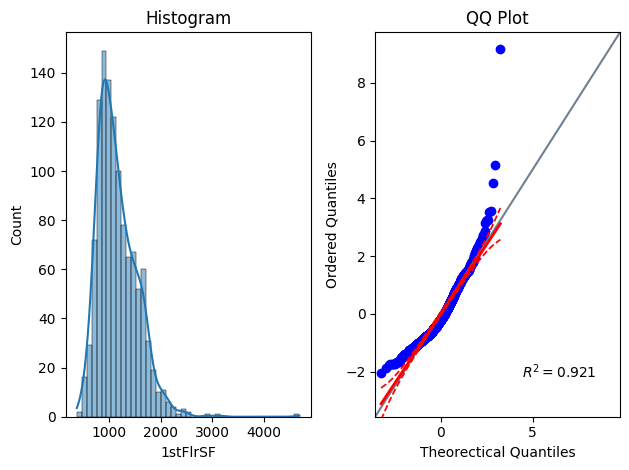

before apply transformation  | skewness: 1.44 | kurtosis: 6.65


*** 1stFlrSF - Log_Base_e ***


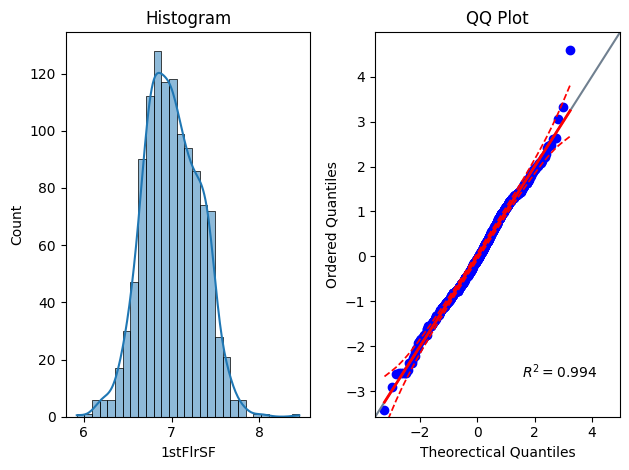

after Log_Base_e transformation  | skewness: 0.11 | kurtosis: 0.05


*** 1stFlrSF - Log_10 ***


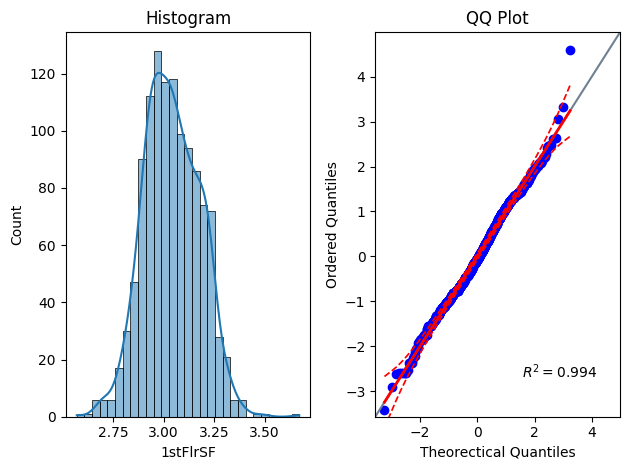

after Log_10 transformation  | skewness: 0.11 | kurtosis: 0.05


*** 1stFlrSF - Reciprocal ***


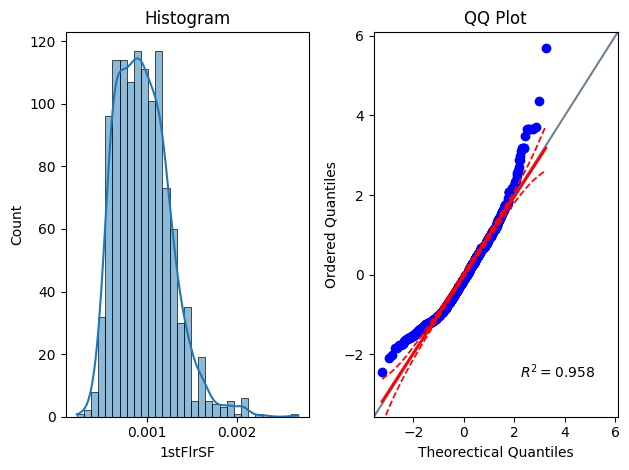

after Reciprocal transformation  | skewness: 0.88 | kurtosis: 1.59


*** 1stFlrSF - Power ***


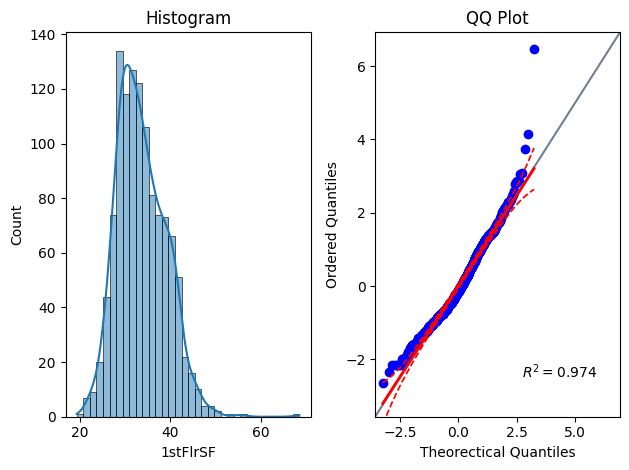

after Power transformation  | skewness: 0.65 | kurtosis: 1.32


*** 1stFlrSF - Box_Cox ***


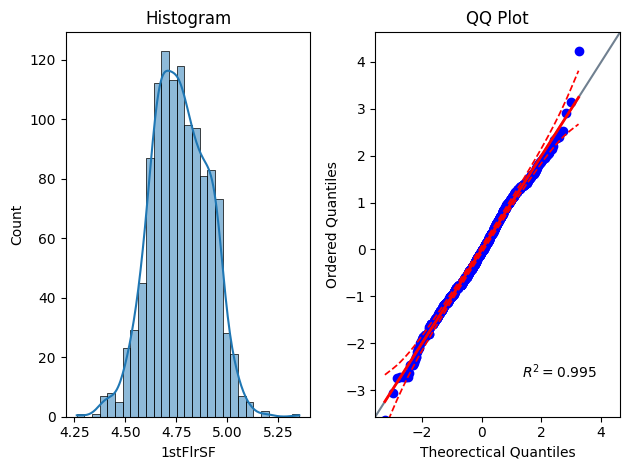

after Box_Cox transformation  | skewness: -0.0 | kurtosis: 0.0


*** 1stFlrSF - Yeo_Johnson ***


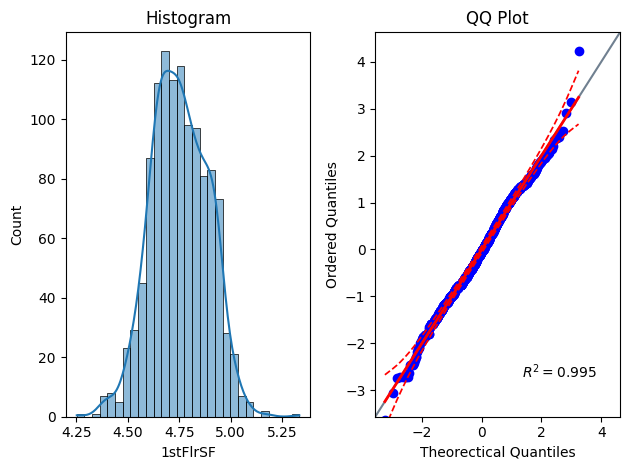

after Yeo_Johnson transformation  | skewness: -0.0 | kurtosis: 0.0


*** 2ndFlrSF ***


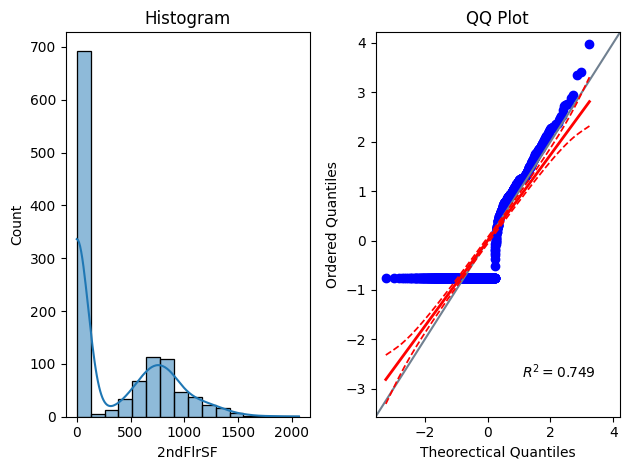

before apply transformation  | skewness: 0.89 | kurtosis: -0.43


Unable to apply Log_e to 2ndFlrSF: Some variables contain zero or negative values, can't apply log 

Unable to apply Log_10 to 2ndFlrSF: Some variables contain zero or negative values, can't apply log 

Unable to apply Reciprocal to 2ndFlrSF: Some variables contain the value zero, can't apply reciprocal transformation. 

Unable to apply Box_Cox to 2ndFlrSF: Data must be positive. 

*** 2ndFlrSF - Power ***


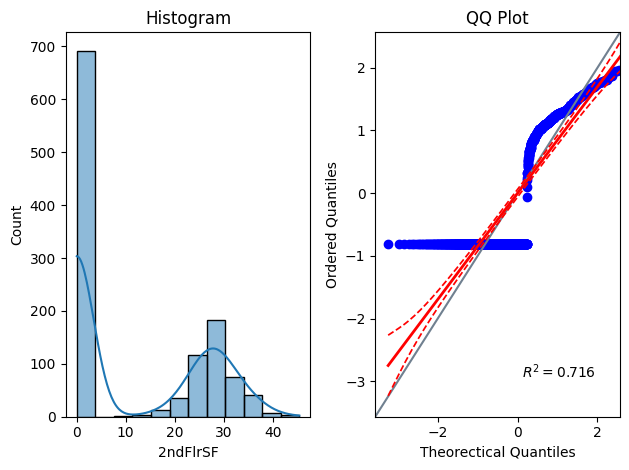

after Power transformation  | skewness: 0.52 | kurtosis: -1.55


*** 2ndFlrSF - Yeo_Johnson ***


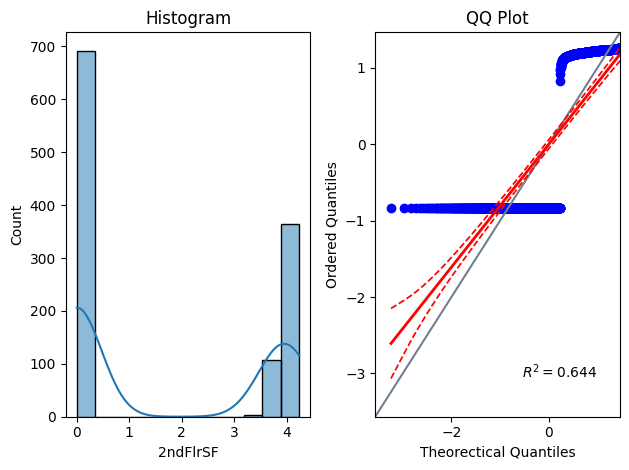

after Yeo_Johnson transformation  | skewness: 0.38 | kurtosis: -1.85


*** BsmtFinSF1 ***


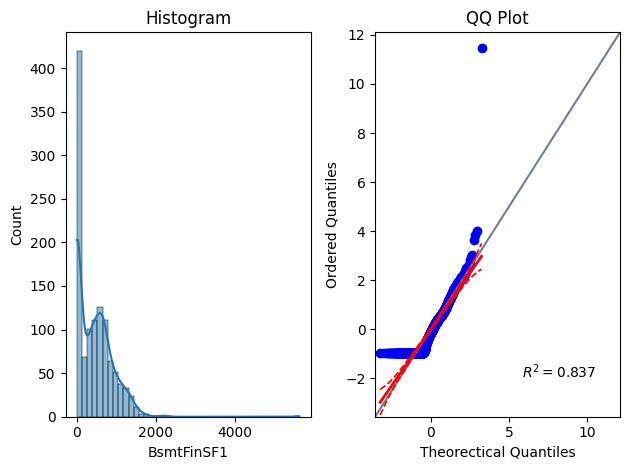

before apply transformation  | skewness: 1.94 | kurtosis: 14.4


Unable to apply Log_e to BsmtFinSF1: Some variables contain zero or negative values, can't apply log 

Unable to apply Log_10 to BsmtFinSF1: Some variables contain zero or negative values, can't apply log 

Unable to apply Reciprocal to BsmtFinSF1: Some variables contain the value zero, can't apply reciprocal transformation. 

Unable to apply Box_Cox to BsmtFinSF1: Data must be positive. 

*** BsmtFinSF1 - Power ***


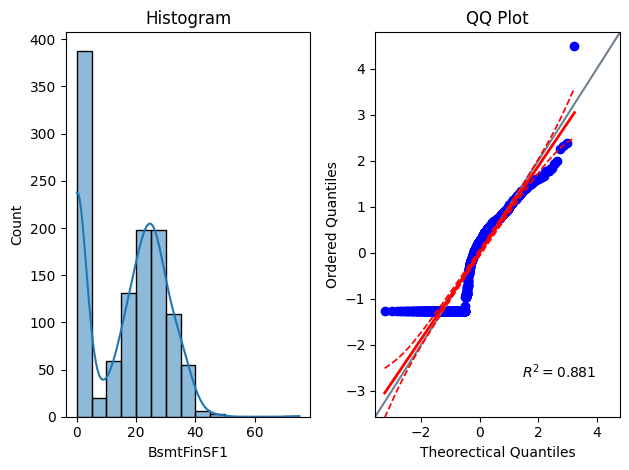

after Power transformation  | skewness: -0.04 | kurtosis: -1.06


*** BsmtFinSF1 - Yeo_Johnson ***


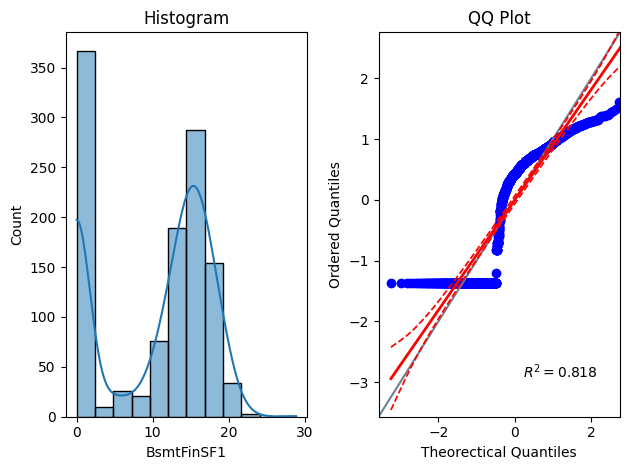

after Yeo_Johnson transformation  | skewness: -0.43 | kurtosis: -1.46


*** BsmtUnfSF ***


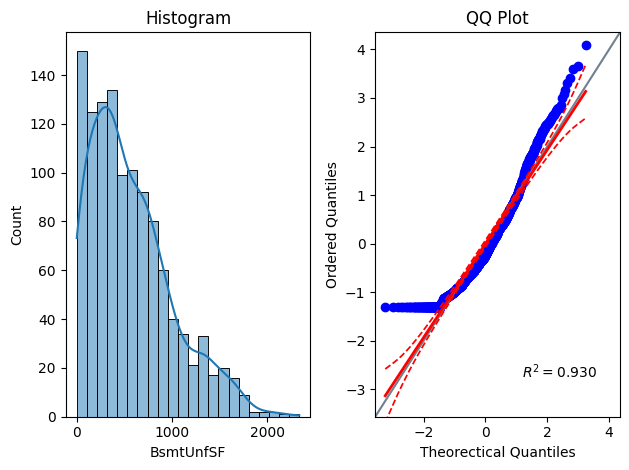

before apply transformation  | skewness: 0.94 | kurtosis: 0.54


Unable to apply Log_e to BsmtUnfSF: Some variables contain zero or negative values, can't apply log 

Unable to apply Log_10 to BsmtUnfSF: Some variables contain zero or negative values, can't apply log 

Unable to apply Reciprocal to BsmtUnfSF: Some variables contain the value zero, can't apply reciprocal transformation. 

Unable to apply Box_Cox to BsmtUnfSF: Data must be positive. 

*** BsmtUnfSF - Power ***


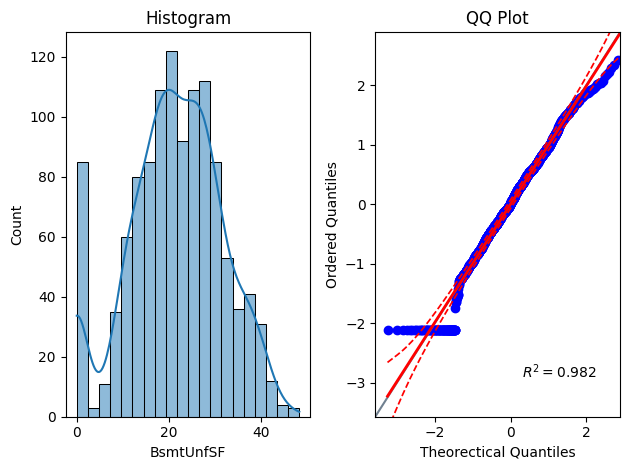

after Power transformation  | skewness: -0.23 | kurtosis: -0.22


*** BsmtUnfSF - Yeo_Johnson ***


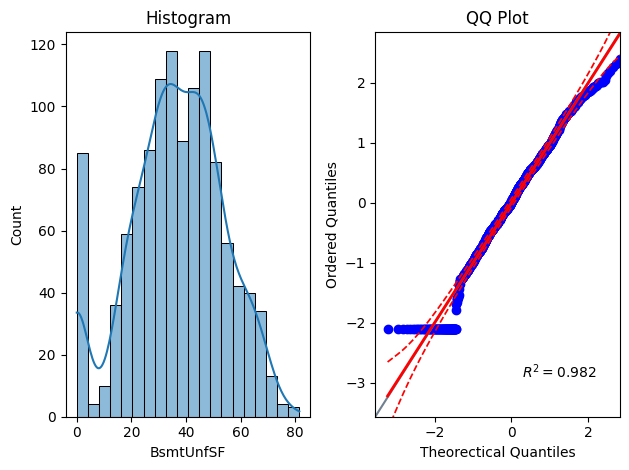

after Yeo_Johnson transformation  | skewness: -0.24 | kurtosis: -0.25


*** EnclosedPorch ***


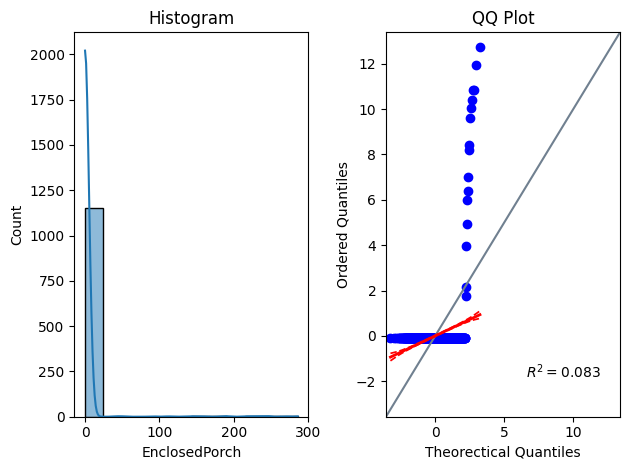

before apply transformation  | skewness: 9.88 | kurtosis: 100.8


Unable to apply Log_e to EnclosedPorch: Some variables contain zero or negative values, can't apply log 

Unable to apply Log_10 to EnclosedPorch: Some variables contain zero or negative values, can't apply log 

Unable to apply Reciprocal to EnclosedPorch: Some variables contain the value zero, can't apply reciprocal transformation. 

Unable to apply Box_Cox to EnclosedPorch: Data must be positive. 

*** EnclosedPorch - Power ***


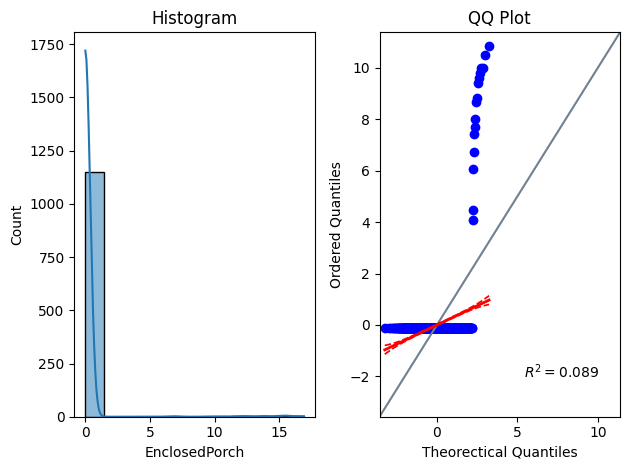

after Power transformation  | skewness: 8.97 | kurtosis: 80.93


*** EnclosedPorch - Yeo_Johnson ***


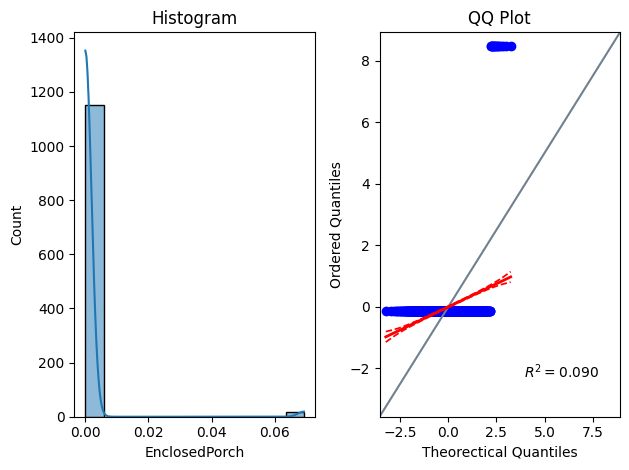

after Yeo_Johnson transformation  | skewness: 8.38 | kurtosis: 68.31


*** GarageArea ***


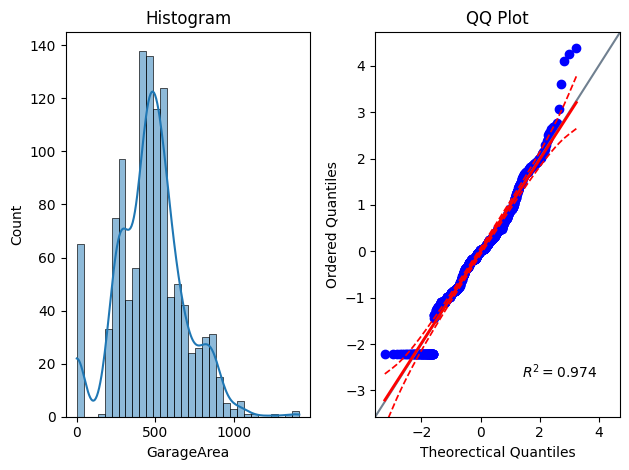

before apply transformation  | skewness: 0.2 | kurtosis: 0.96


Unable to apply Log_e to GarageArea: Some variables contain zero or negative values, can't apply log 

Unable to apply Log_10 to GarageArea: Some variables contain zero or negative values, can't apply log 

Unable to apply Reciprocal to GarageArea: Some variables contain the value zero, can't apply reciprocal transformation. 

Unable to apply Box_Cox to GarageArea: Data must be positive. 

*** GarageArea - Power ***


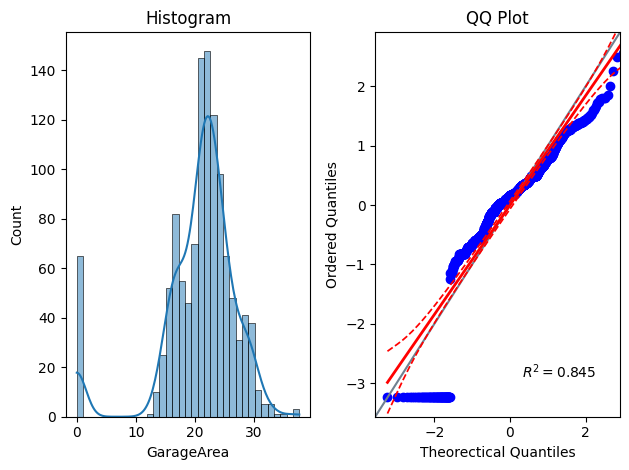

after Power transformation  | skewness: -1.59 | kurtosis: 3.71


*** GarageArea - Yeo_Johnson ***


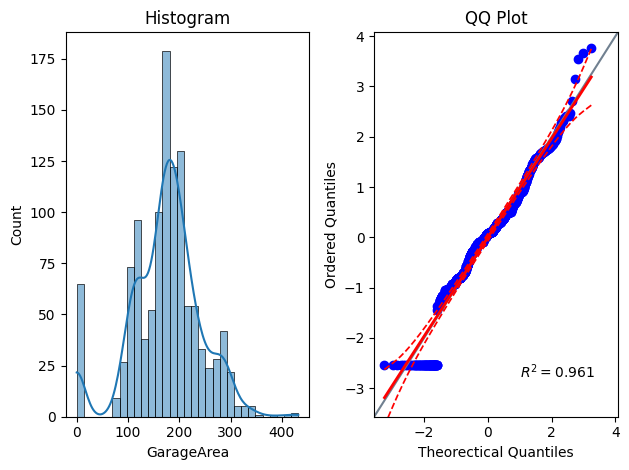

after Yeo_Johnson transformation  | skewness: -0.32 | kurtosis: 1.07


*** GrLivArea ***


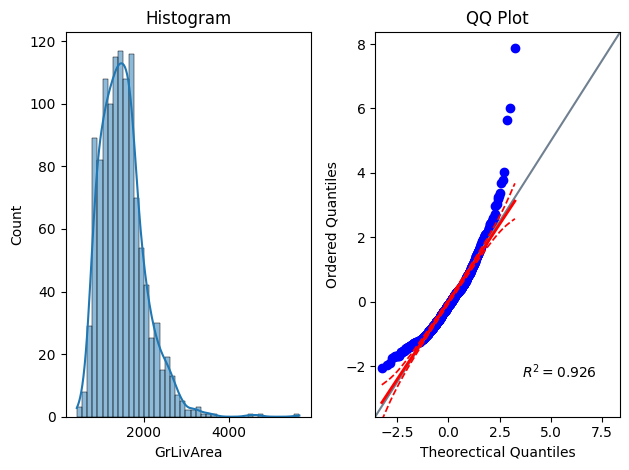

before apply transformation  | skewness: 1.39 | kurtosis: 5.3


*** GrLivArea - Log_Base_e ***


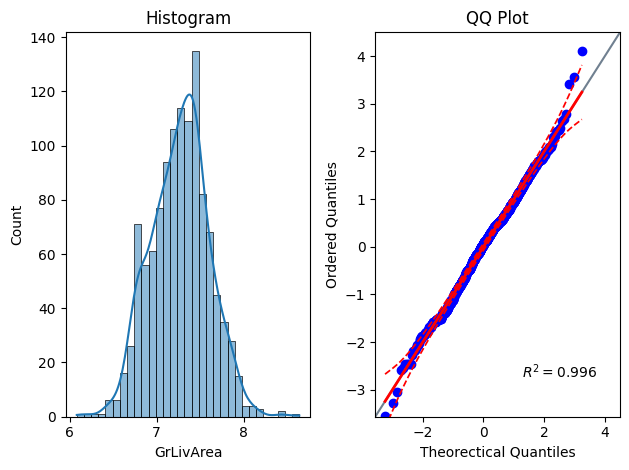

after Log_Base_e transformation  | skewness: 0.0 | kurtosis: 0.15


*** GrLivArea - Log_10 ***


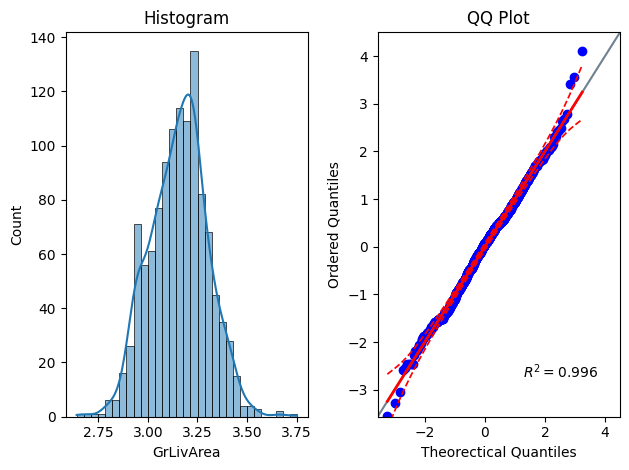

after Log_10 transformation  | skewness: 0.0 | kurtosis: 0.15


*** GrLivArea - Reciprocal ***


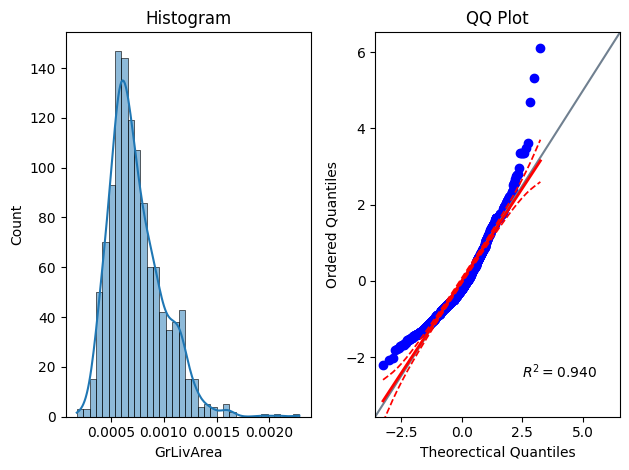

after Reciprocal transformation  | skewness: 1.08 | kurtosis: 2.21


*** GrLivArea - Power ***


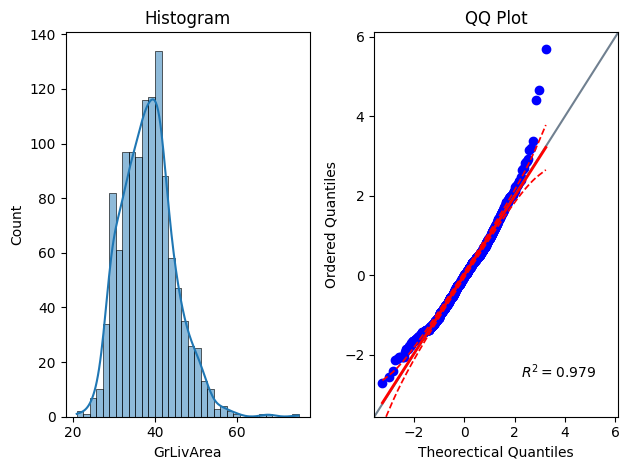

after Power transformation  | skewness: 0.59 | kurtosis: 1.27


*** GrLivArea - Box_Cox ***


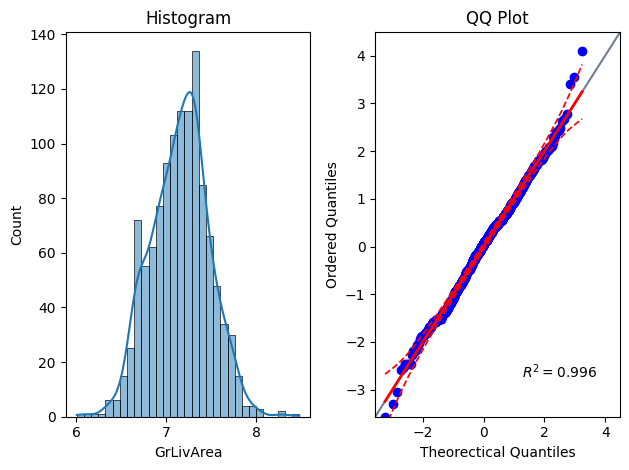

after Box_Cox transformation  | skewness: -0.0 | kurtosis: 0.15


*** GrLivArea - Yeo_Johnson ***


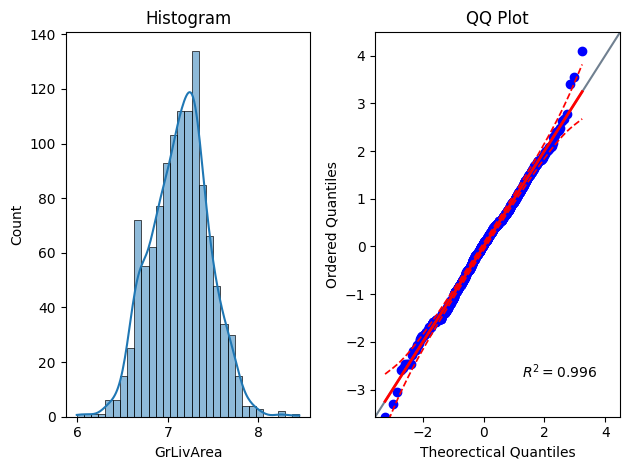

after Yeo_Johnson transformation  | skewness: -0.0 | kurtosis: 0.15


*** LotArea ***


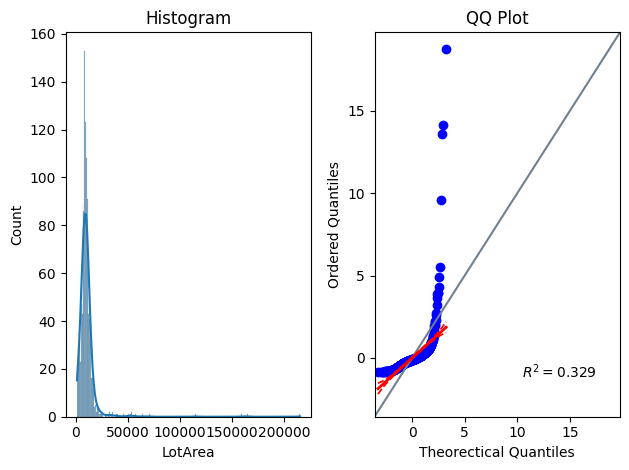

before apply transformation  | skewness: 11.63 | kurtosis: 177.51


*** LotArea - Log_Base_e ***


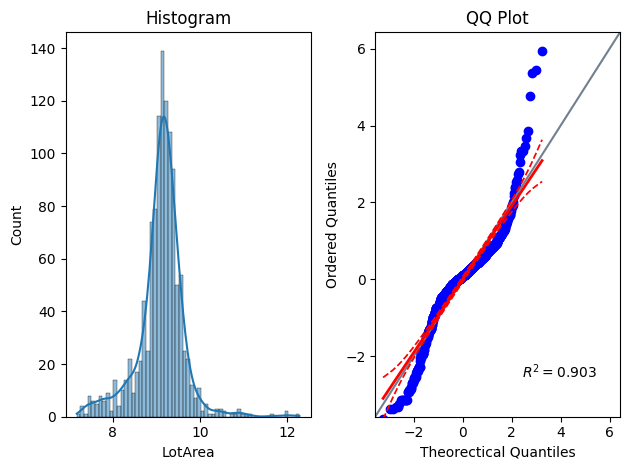

after Log_Base_e transformation  | skewness: -0.03 | kurtosis: 4.7


*** LotArea - Log_10 ***


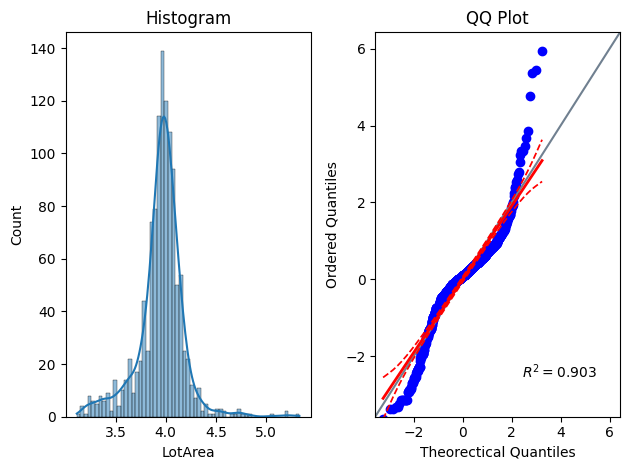

after Log_10 transformation  | skewness: -0.03 | kurtosis: 4.7


*** LotArea - Reciprocal ***


/workspace/.pip-modules/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


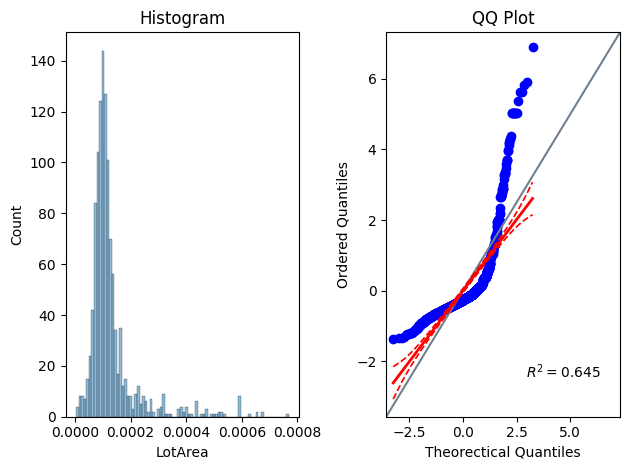

after Reciprocal transformation  | skewness: 3.23 | kurtosis: 12.56


*** LotArea - Power ***


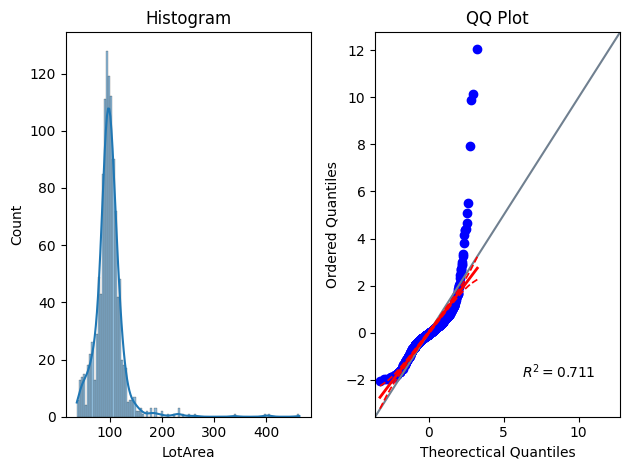

after Power transformation  | skewness: 4.33 | kurtosis: 40.39


*** LotArea - Box_Cox ***


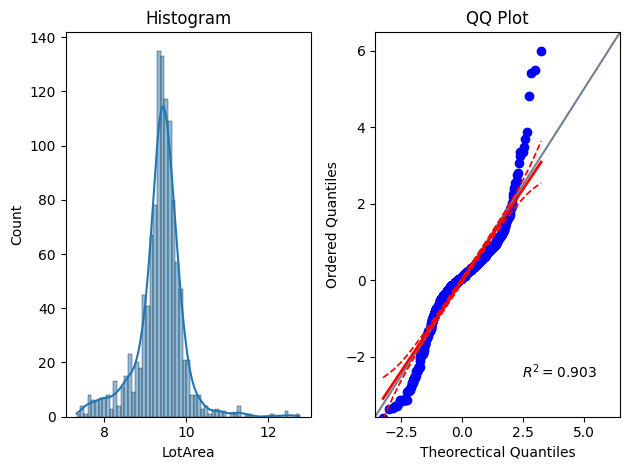

after Box_Cox transformation  | skewness: 0.01 | kurtosis: 4.79


*** LotArea - Yeo_Johnson ***


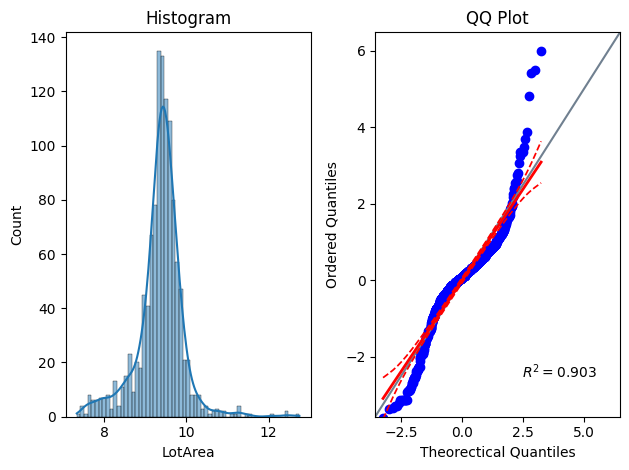

after Yeo_Johnson transformation  | skewness: 0.01 | kurtosis: 4.79


*** LotFrontage ***


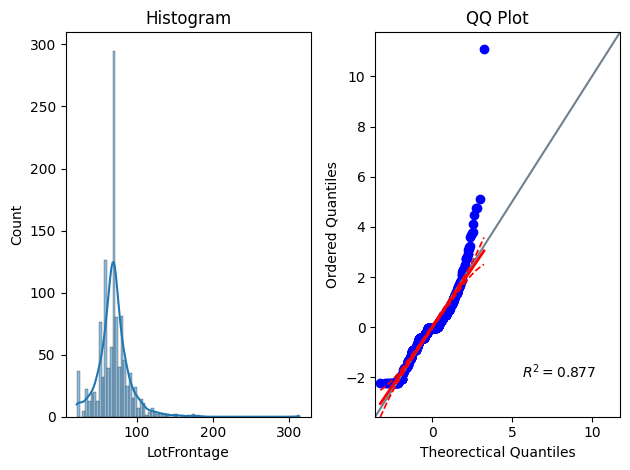

before apply transformation  | skewness: 1.85 | kurtosis: 15.25


*** LotFrontage - Log_Base_e ***


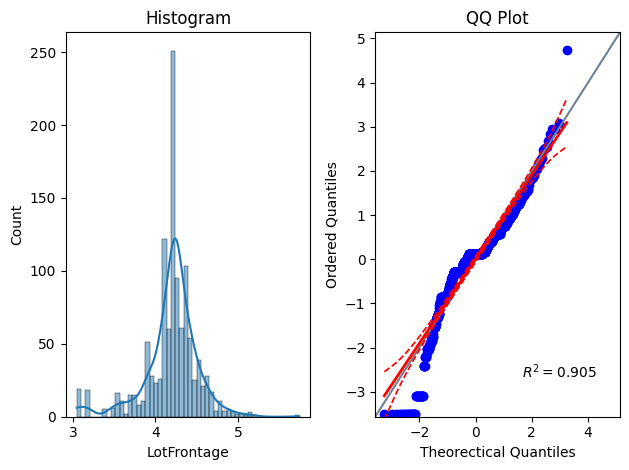

after Log_Base_e transformation  | skewness: -0.94 | kurtosis: 3.07


*** LotFrontage - Log_10 ***


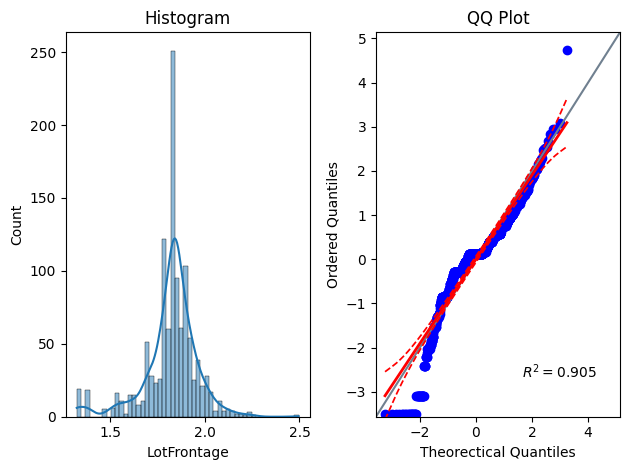

after Log_10 transformation  | skewness: -0.94 | kurtosis: 3.07


*** LotFrontage - Reciprocal ***


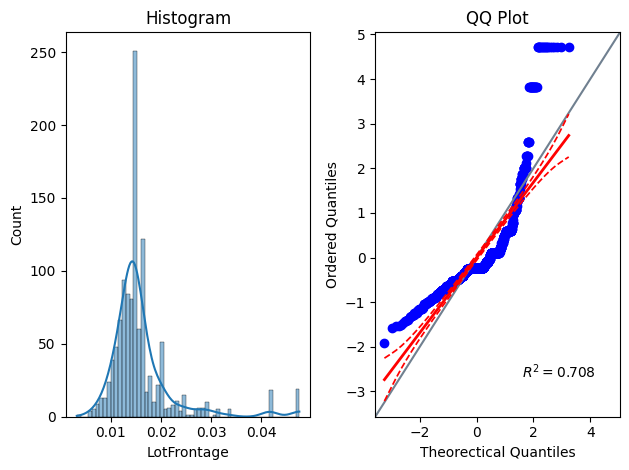

after Reciprocal transformation  | skewness: 2.76 | kurtosis: 9.24


*** LotFrontage - Power ***


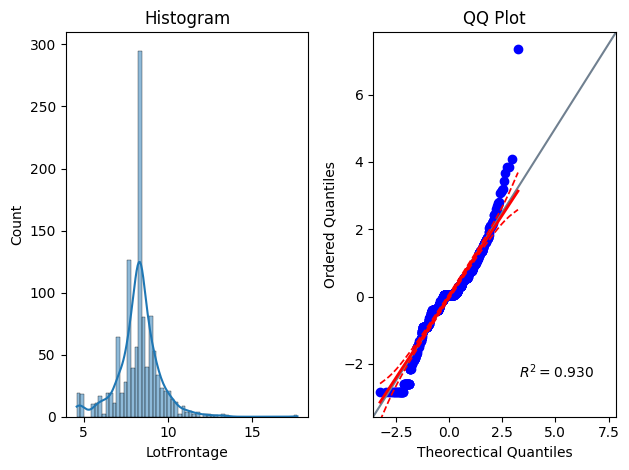

after Power transformation  | skewness: 0.2 | kurtosis: 4.12


*** LotFrontage - Box_Cox ***


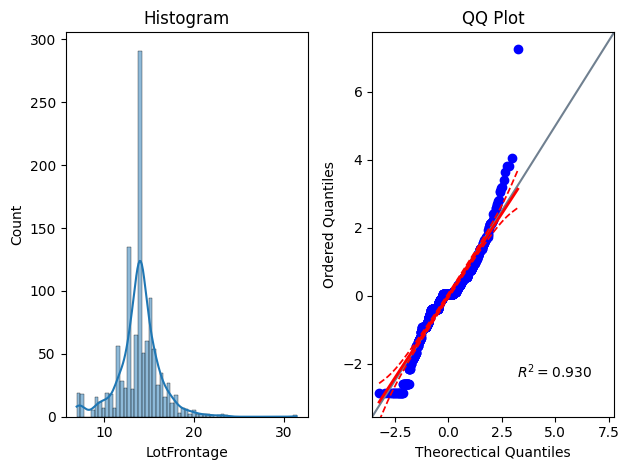

after Box_Cox transformation  | skewness: 0.16 | kurtosis: 4.01


*** LotFrontage - Yeo_Johnson ***


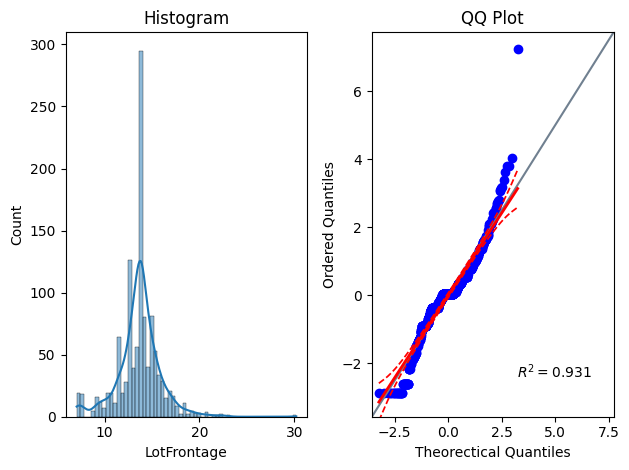

after Yeo_Johnson transformation  | skewness: 0.16 | kurtosis: 3.97


*** MasVnrArea ***


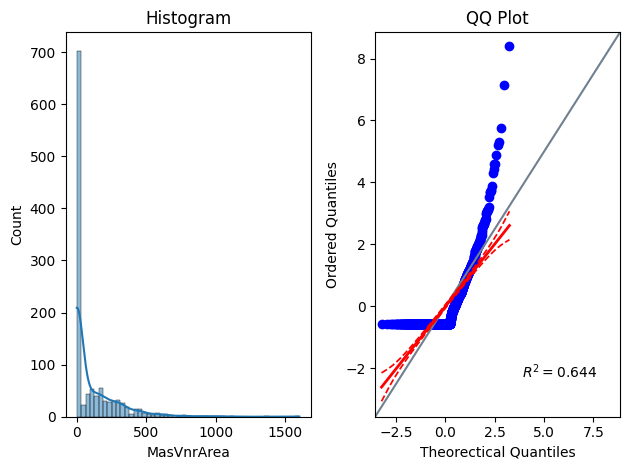

before apply transformation  | skewness: 2.68 | kurtosis: 10.73


Unable to apply Log_e to MasVnrArea: Some variables contain zero or negative values, can't apply log 

Unable to apply Log_10 to MasVnrArea: Some variables contain zero or negative values, can't apply log 

Unable to apply Reciprocal to MasVnrArea: Some variables contain the value zero, can't apply reciprocal transformation. 

Unable to apply Box_Cox to MasVnrArea: Data must be positive. 

*** MasVnrArea - Power ***


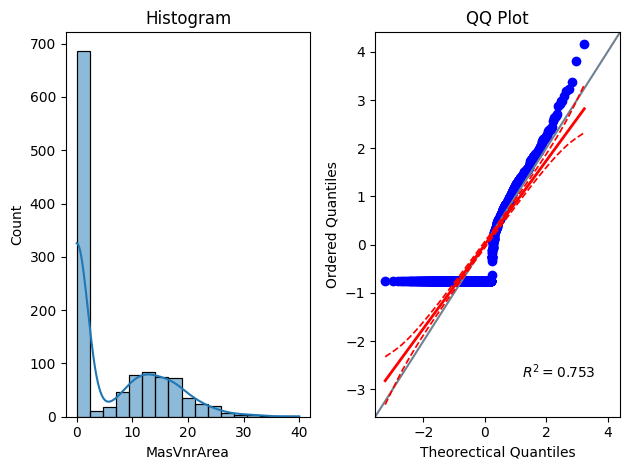

after Power transformation  | skewness: 1.0 | kurtosis: -0.05


*** MasVnrArea - Yeo_Johnson ***


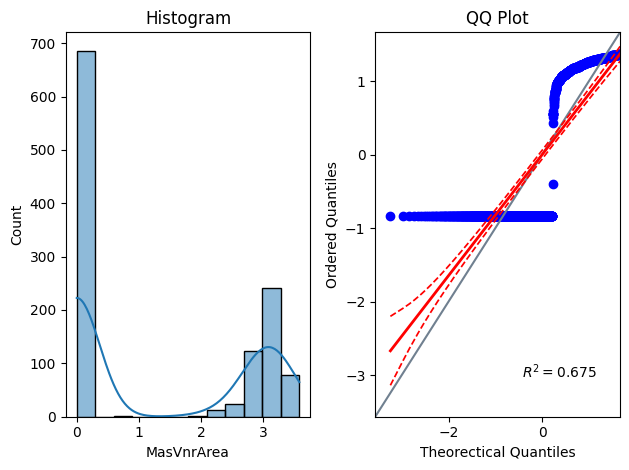

after Yeo_Johnson transformation  | skewness: 0.39 | kurtosis: -1.81


*** OpenPorchSF ***


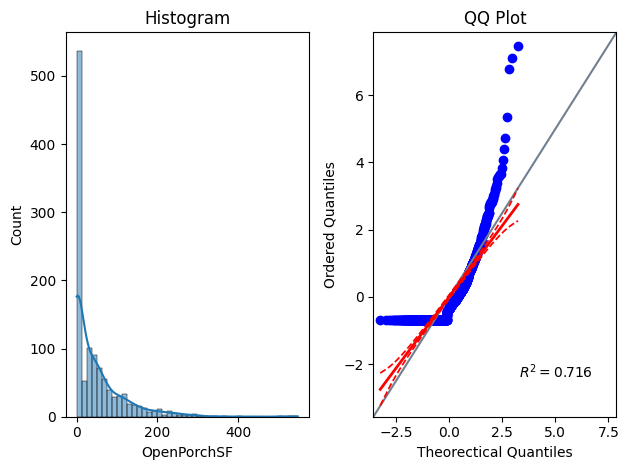

before apply transformation  | skewness: 2.43 | kurtosis: 8.97


Unable to apply Log_e to OpenPorchSF: Some variables contain zero or negative values, can't apply log 

Unable to apply Log_10 to OpenPorchSF: Some variables contain zero or negative values, can't apply log 

Unable to apply Reciprocal to OpenPorchSF: Some variables contain the value zero, can't apply reciprocal transformation. 

Unable to apply Box_Cox to OpenPorchSF: Data must be positive. 

*** OpenPorchSF - Power ***


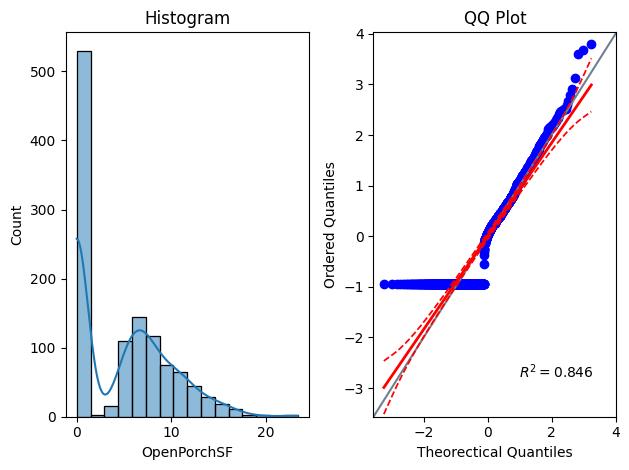

after Power transformation  | skewness: 0.64 | kurtosis: -0.45


*** OpenPorchSF - Yeo_Johnson ***


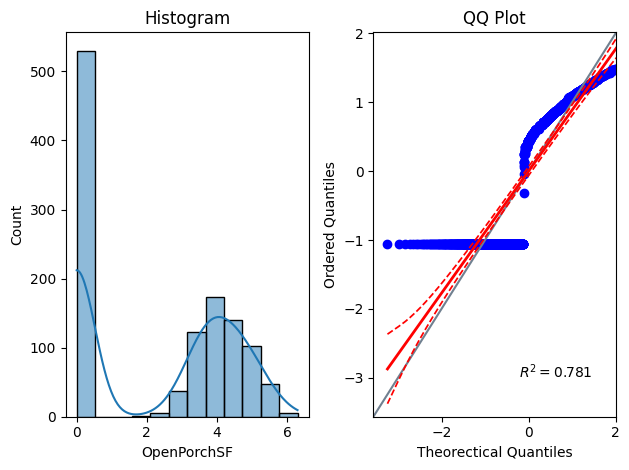

after Yeo_Johnson transformation  | skewness: 0.0 | kurtosis: -1.77


*** TotalBsmtSF ***


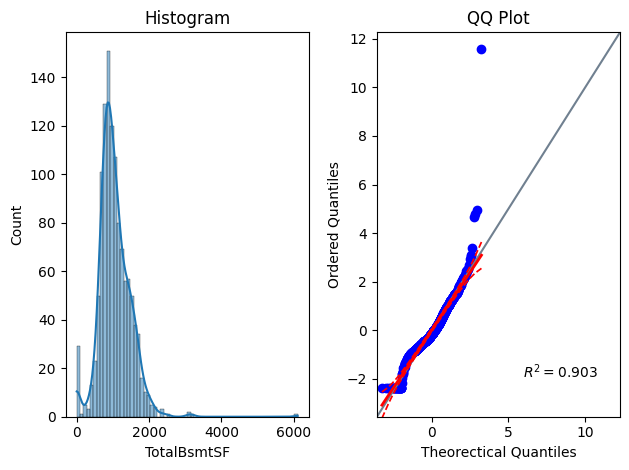

before apply transformation  | skewness: 1.74 | kurtosis: 16.27


Unable to apply Log_e to TotalBsmtSF: Some variables contain zero or negative values, can't apply log 

Unable to apply Log_10 to TotalBsmtSF: Some variables contain zero or negative values, can't apply log 

Unable to apply Reciprocal to TotalBsmtSF: Some variables contain the value zero, can't apply reciprocal transformation. 

Unable to apply Box_Cox to TotalBsmtSF: Data must be positive. 

*** TotalBsmtSF - Power ***


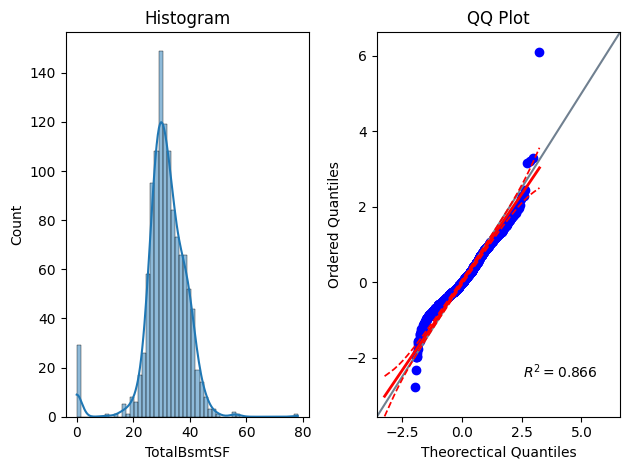

after Power transformation  | skewness: -1.24 | kurtosis: 6.54


*** TotalBsmtSF - Yeo_Johnson ***


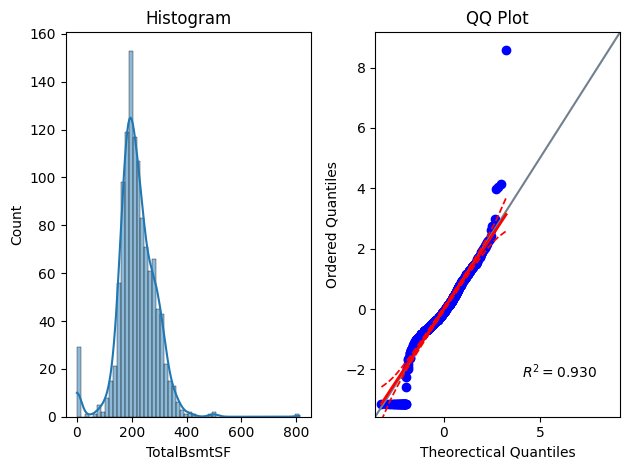

after Yeo_Johnson transformation  | skewness: 0.29 | kurtosis: 6.22


*** WoodDeckSF ***


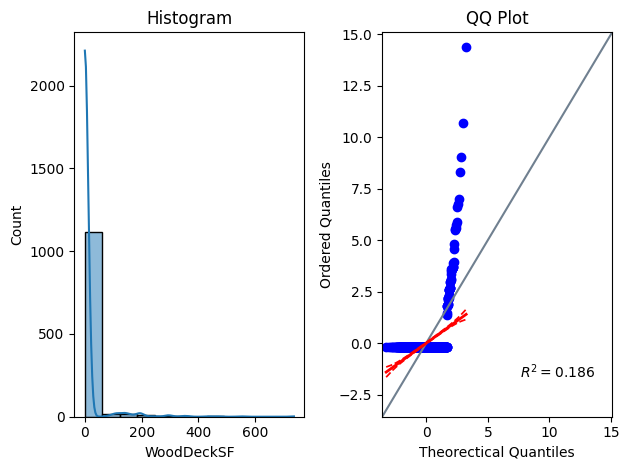

before apply transformation  | skewness: 7.29 | kurtosis: 67.91


Unable to apply Log_e to WoodDeckSF: Some variables contain zero or negative values, can't apply log 

Unable to apply Log_10 to WoodDeckSF: Some variables contain zero or negative values, can't apply log 

Unable to apply Reciprocal to WoodDeckSF: Some variables contain the value zero, can't apply reciprocal transformation. 

Unable to apply Box_Cox to WoodDeckSF: Data must be positive. 

*** WoodDeckSF - Power ***


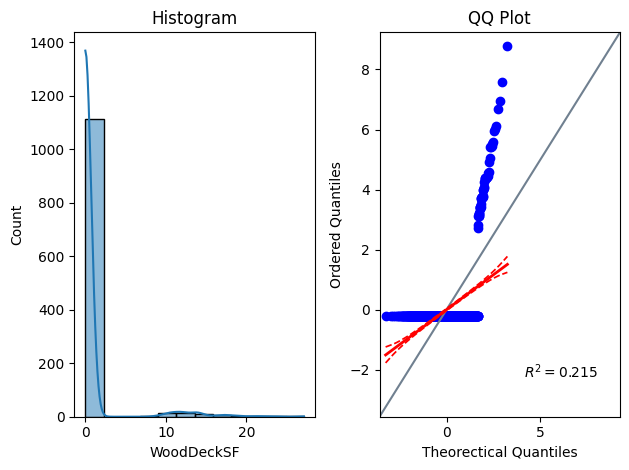

after Power transformation  | skewness: 4.92 | kurtosis: 24.79


*** WoodDeckSF - Yeo_Johnson ***


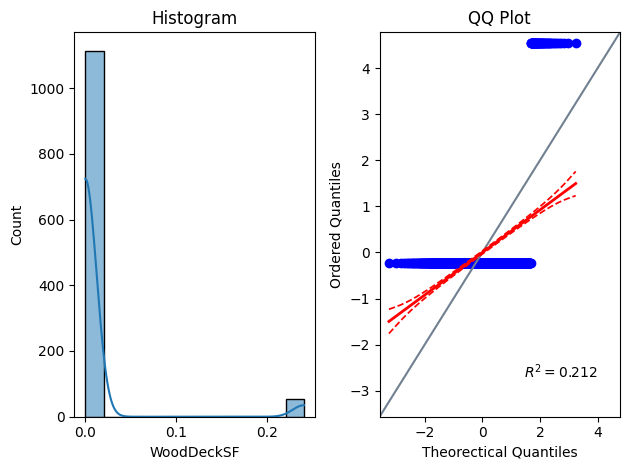

after Yeo_Johnson transformation  | skewness: 4.33 | kurtosis: 16.75




In [28]:
def calculate_skew_kurtosis(df,col, moment):
  print(f"{moment}  | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")


def transformer_distribution_effect(df):
  for col in df.columns:
    print(f"*** {col} ***")
    fig, axes = plt.subplots(nrows=1, ncols=2)
    sns.histplot(data=df, x=col, kde=True, ax=axes[0])
    axes[0].set_title("Histogram")
    pg.qqplot(df[col], dist='norm',ax=axes[1])
    axes[1].set_title('QQ Plot')
    axes[1].set_xlabel('Theorectical Quantiles')
    axes[1].set_ylabel('Ordered Quantiles')
    plt.tight_layout()
    plt.show()
    calculate_skew_kurtosis(df,col,'before apply transformation')
    print("\n")

    transformed_dfs = numerical_transformers(df, col)
    t=0
    for transformed in transformed_dfs:
      if type(transformed) == type('str'):
        t+=1
        continue
      else:
        print(f"*** {col} - {transformers_map[t]} ***")
        fig, axes = plt.subplots(nrows=1, ncols=2)
        sns.histplot(data=transformed, x=col, kde=True, ax=axes[0])
        axes[0].set_title(f"Histogram")
        pg.qqplot(transformed[col], dist='norm',ax=axes[1])
        axes[1].set_title('QQ Plot')
        axes[1].set_xlabel('Theorectical Quantiles')
        axes[1].set_ylabel('Ordered Quantiles')
        plt.tight_layout()
        plt.show()
        calculate_skew_kurtosis(transformed,col,f'after {transformers_map[t]} transformation')
        t += 1
        print("\n")


transformers_map = {
  0: 'Log_Base_e',
  1: 'Log_10',
  2: 'Reciprocal',
  3: 'Power',
  4: 'Box_Cox',
  5: 'Yeo_Johnson'
}

numerical_features = ['1stFlrSF', 
                    '2ndFlrSF', 
                    'BsmtFinSF1', 
                    'BsmtUnfSF', 
                    'EnclosedPorch', 
                    'GarageArea', 
                    'GrLivArea', 
                    'LotArea', 
                    'LotFrontage', 
                    'MasVnrArea', 
                    'OpenPorchSF', 
                    'TotalBsmtSF', 
                    'WoodDeckSF']

transformer_distribution_effect(X_train[numerical_features])

### Numerical Transformations - Conclusions
After viewing our results for the various numerical transformations, we will apply the following to each selected feature in the pipeline:
* Log Base 'e'
    * <code>GrLivArea</code>
    * <code>LotArea</code>
* PowerTransformer
    * <code>BsmtFinSF1</code>
    * <code>BsmtUnfSF</code>
    * <code>MasVnrArea</code>
    * <code>OpenPorchSF</code>
* Box Cox
    * <code>1stFlrSF</code>
* Yeo Johnson
    * <code>EnclosedPorch</code>
    * <code>LotFrontage</code>
    * <code>TotalBsmtSF</code>
    * <code>WoodDeckSF</code>

## Handling Outliers

Next we will deal with the variables with the most significant outliers, which is <code>GrLivArea</code>, <code>LotFrontage</code>, and <code>TotalBsmtSF</code>.

* First we will import our transformers to test, and list our features

In [30]:
from feature_engine.outliers import OutlierTrimmer, Winsorizer
outlier_features = ['GrLivArea', 'LotFrontage', 'TotalBsmtSF']

* First we will examine the Winsorizer transformer, then OutlierTrimmer. We will see the performance for both transformers and decide on which to use within our pipeline.

* Ideally Winsorizer would be the preference as trimming the outliers means having them disregarded during the model training which should be treated with care
    * The Winsorizer defaults its fold parameter to *'auto* meaning it will select the most appropriate value based on the capping method

In [62]:
gaussian_winsorizer = Winsorizer(capping_method='gaussian', tail='right', variables=outlier_features)
gaussian_win_results = gaussian_winsorizer.fit_transform(X_train)

In [64]:
iqr_winsorizer = Winsorizer(capping_method='iqr', tail='right', variables=outlier_features)
iqr_win_results = iqr_winsorizer.fit_transform(X_train)

* Now we will examine our OutlierTrimmer transformation, but first we will evaluate using both the interquartile range and gaussian approximation and compare the results before deciding which to use
    * The OutlierTrimmer documentation recommends different fold values based on the capping_method
        * Gaussian : **(2 or 3)** we will choose 2
        * IQR : **(1.5 or 3)** we will choose 1.5

In [58]:
gaussian_outlier_transformer = OutlierTrimmer(capping_method='gaussian', tail='right', fold=2, variables=outlier_features)
gaussian_results = gaussian_outlier_transformer.fit_transform(X_train)

In [59]:
iqr_outlier_transformer = OutlierTrimmer(capping_method='gaussian', tail='right', fold=1.5, variables=outlier_features)
iqr_results = iqr_outlier_transformer.fit_transform(X_train)

* Now we can display our results using more visualizations.

In [69]:
def outlier_result_display(df, iqr_df, gaussian_df, transformer=['Winsorizer', 'Outlier Trimmer']):
    for col in df.columns:
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5), gridspec_kw={"height_ratios": (0.3, 0.7)})
        # Original data
        sns.boxplot(data=df, x=col, ax=axes[0,0])
        sns.histplot(data=df, x=col, kde=True, ax=axes[1,0])
        # IQR Results
        sns.boxplot(data=iqr_df, x=col, ax=axes[0,1])
        sns.histplot(data=iqr_df, x=col, kde=True, ax=axes[1,1])
        # Gaussian Results
        sns.boxplot(data=gaussian_df, x=col, ax=axes[0,2])
        sns.histplot(data=gaussian_df, x=col, kde=True, ax=axes[1,2])
        fig.suptitle(f"{col} Distribution - {transformer}")
        axes[0,1].set_title('IQR')
        axes[0,2].set_title('Gaussian')
        plt.tight_layout()
        plt.show()


### Winsorizer Results

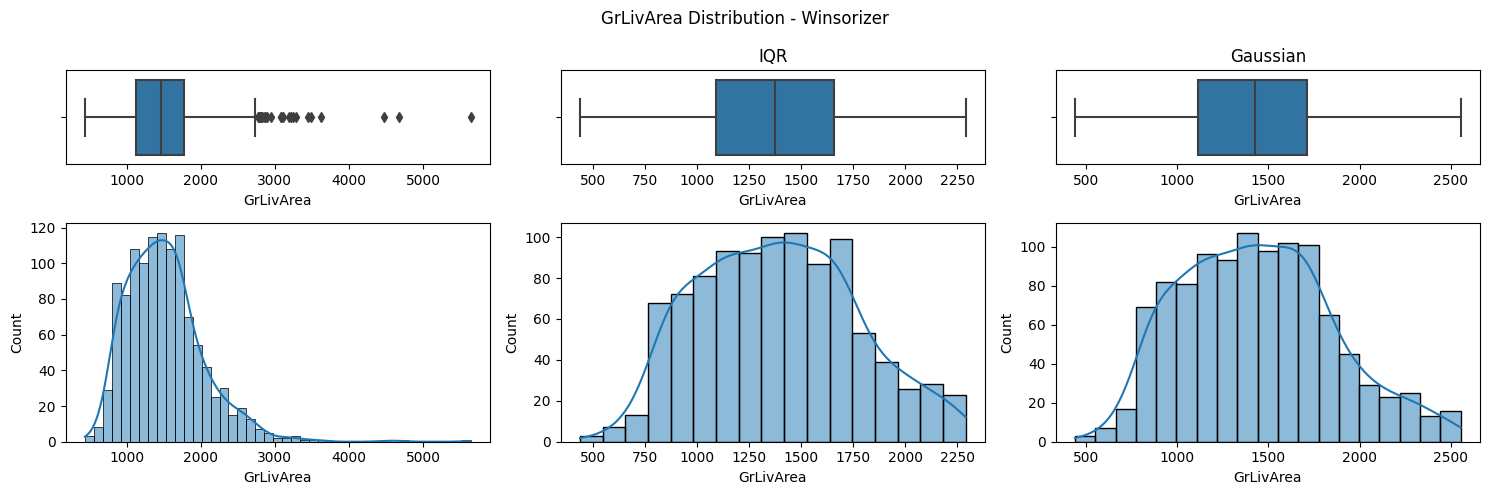

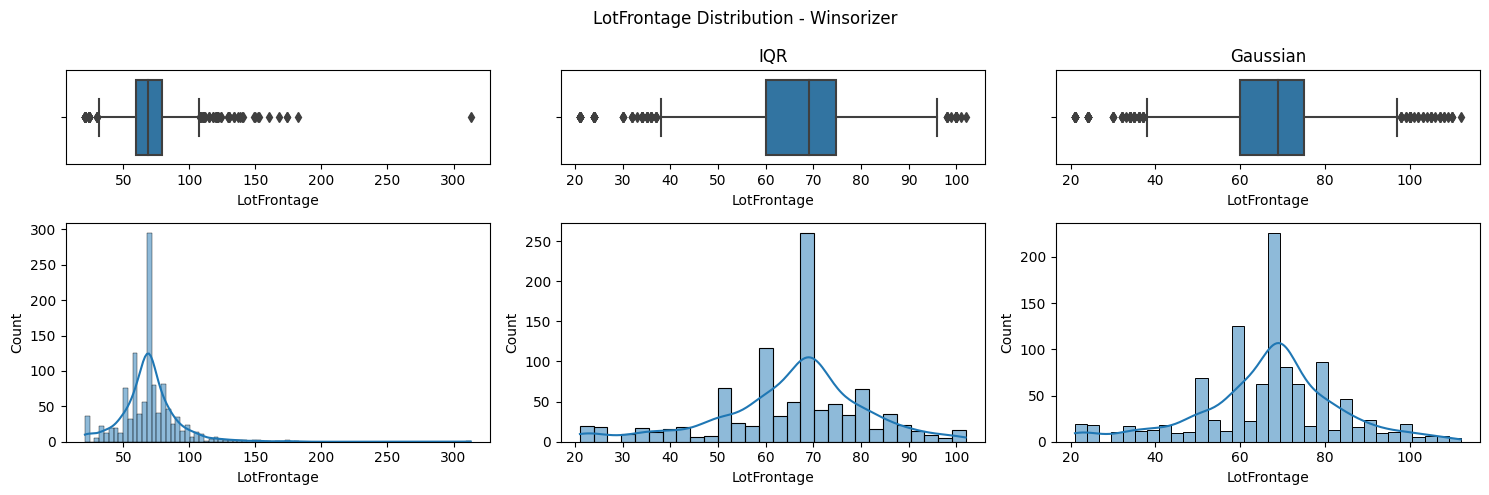

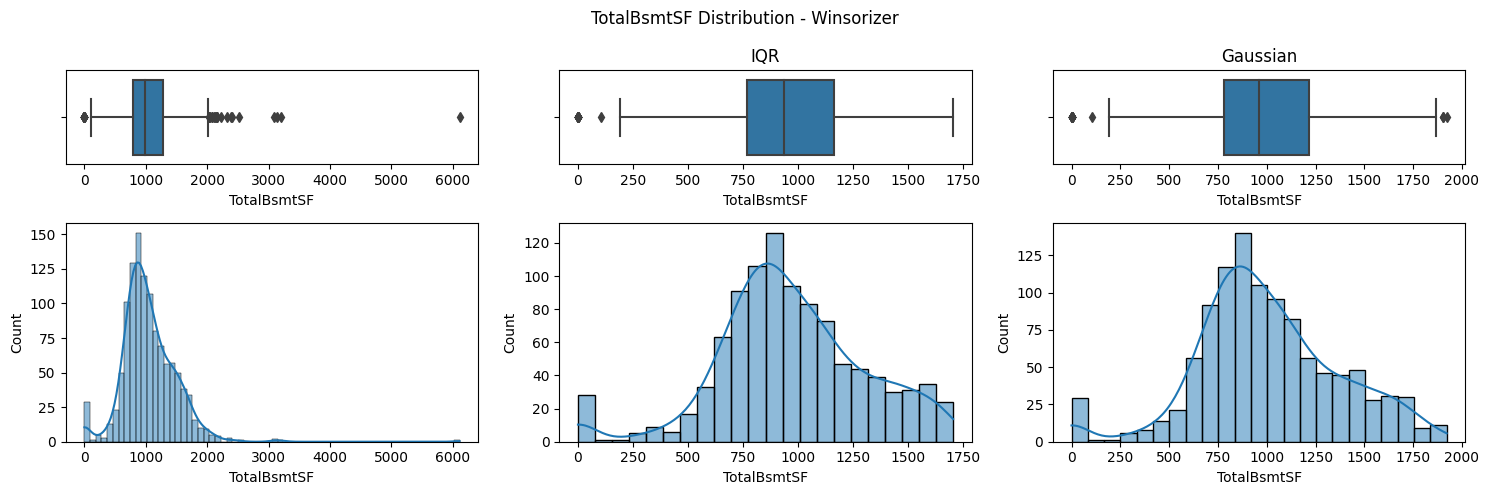

In [70]:
outlier_result_display(X_train[outlier_features], iqr_df=iqr_results, gaussian_df=gaussian_results, transformer='Winsorizer')

### Outlier Trimmer Results

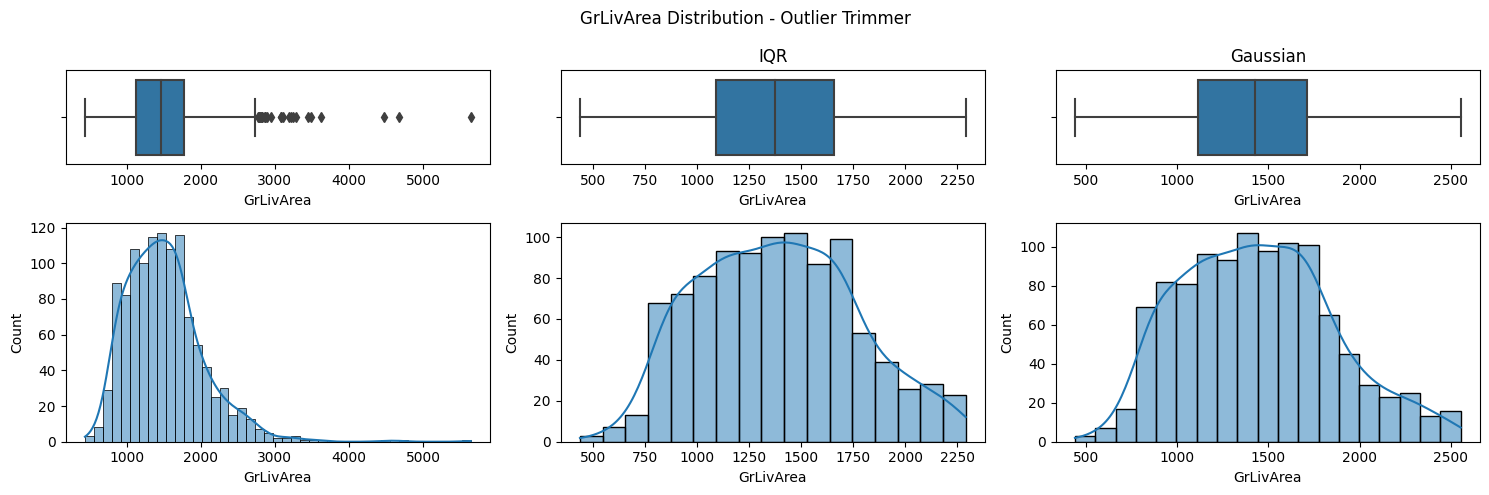

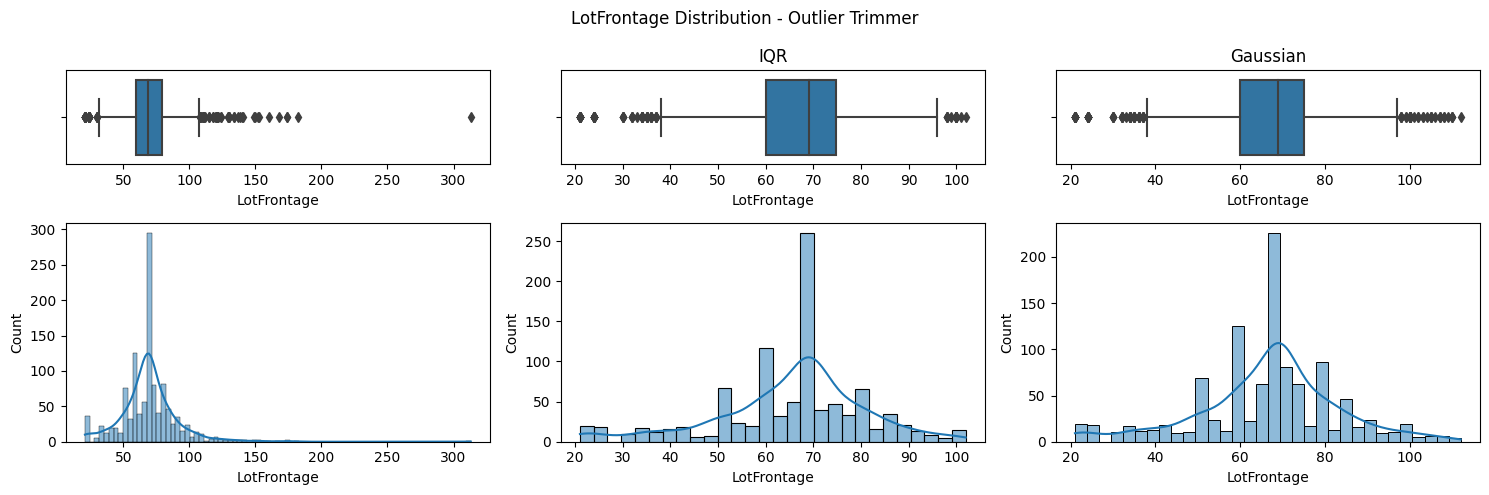

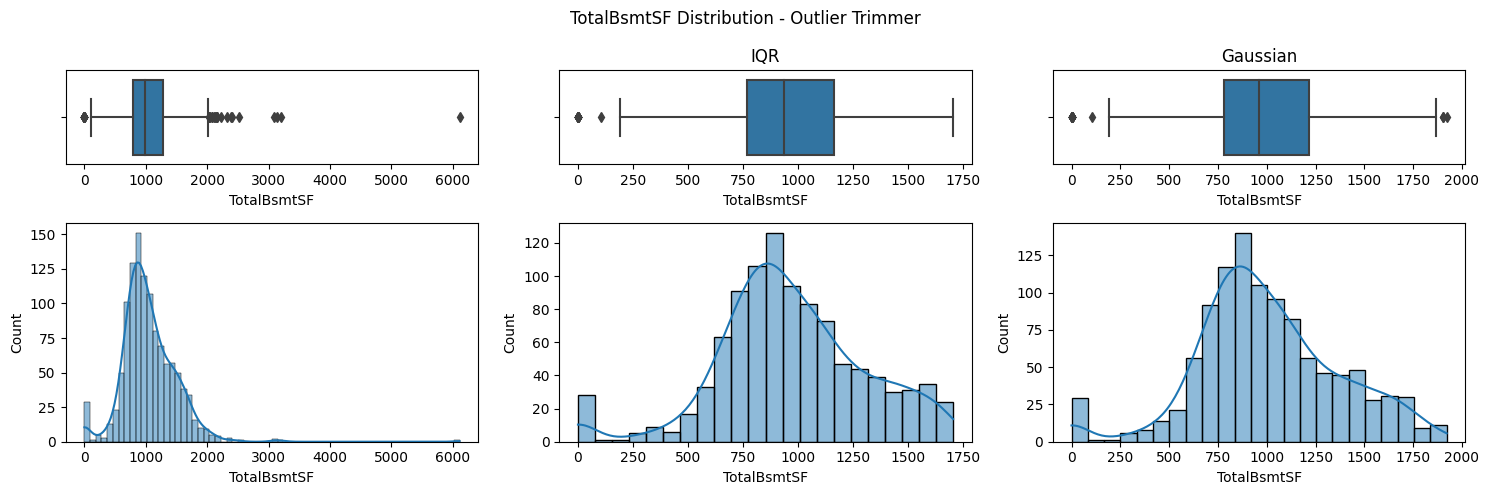

In [71]:
outlier_result_display(X_train[outlier_features], iqr_df=iqr_results, gaussian_df=gaussian_results, transformer='Outlier Trimmer')

### Outlier Conclusions

* Our results point towards the best outlier method being the Winsorizer using the Gaussian capping method. However for <code>GrLivArea</code> we have the very similar results for both the OutlierTrimmer and the Winsorizer. In this instance we will chose to use the OutlierTrimmer.

    * Winsorizer:
        <code>LotFrontage</code>
        <code>TotalBsmtSF</code>
    * OutlierTrimmer
        <code>GrLivArea</code>

---

## Smart Correlation

In our final feature engineering step we will evalaute the features using the SmartCorrelatedSelection transformer to see if we have any unneccesary features. We will start by importing the transformer.

In [72]:
from feature_engine.selection import SmartCorrelatedSelection

* Similarly to our correlation study we can use both the pearson and spearman methods to analyse the correlation levels of the features.
    * We will use variance as our selection method keeping the feature from a correlated group with the highest variance

In [75]:
pearson_corr_selection = SmartCorrelatedSelection(method='pearson', threshold=0.8, selection_method='variance', missing_values='ignore')
pearson_corr_selection.fit_transform(X_train)
pearson_corr_selection.correlated_feature_sets_

/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]


[{'1stFlrSF', 'TotalBsmtSF'}]

In [76]:
spearman_corr_selection = SmartCorrelatedSelection(method='spearman', threshold=0.8, selection_method='variance', missing_values='ignore')
spearman_corr_selection.fit_transform(X_train)
spearman_corr_selection.correlated_feature_sets_

/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]


[{'1stFlrSF', 'TotalBsmtSF'}, {'GarageYrBlt', 'YearBuilt'}]

In [77]:
pearson_corr_selection.features_to_drop_

['1stFlrSF']

In [78]:
spearman_corr_selection.features_to_drop_

['1stFlrSF', 'GarageYrBlt']

Our results clearly show from both methods that <code>1stFlrSF</code> should be dropped. 

---

# Conclusions

After performing the analysis of the various transformations we have produced a list of the transformers selected to be used within our pipeline

* Catergorical Transformers: 
  * OrdinalEncoder (Encoding Method - Ordered):
    * <code>BsmtExposure</code>
    * <code>BsmtFinType1</code>
    * <code>GarageFinish</code>
    * <code>KichenQual</code>
* Numerical Transformers:
  * LogTransformer (Base 'e'):
    * <code>GrLivArea</code>
    * <code>LotArea</code>
  * PowerTransformer:
    * <code>BsmtFinSF1</code>
    * <code>BsmtUnfSF</code>
    * <code>MasVnrArea</code>
    * <code>OpenPorchSF</code>
  * BoxCoxTransfomer:
    * <code>1stFlrSF</code>
  * YeoJohnsonTransformer:
    * <code>EnclosedPorch</code>
    * <code>LotFrontage</code>
    * <code>TotalBsmtSF</code>
    * <code>WoodDeckSF</code>
* Outlier Handling:
  * Winsorizer (Gaussian Approximation):
    * <code>LotFrontage</code>
    * <code>TotalBsmtSF</code>
  * OutlierTrimmer (Gaussian Approximation):
    * <code>GrLivArea</code>
* Smart Correlation (Variables to drop):
  * <code>1stFlrSF</code>
